### SQL Operations.
Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
import sqlite3
import csv

In [3]:
# 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table
con = sqlite3.connect('crime_against_women.db')

In [4]:
con.execute("DROP TABLE IF EXISTS CRIME")

In [7]:
con.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Rape INTEGER,Kidnapping INTEGER,Dowry INTEGER,Assault INTEGER,Insult INTEGER,Cruelty INTEGER, Importation INTEGER)''')

In [8]:
with open(r'C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Inserting data into the table
        con.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?, ?,?,?,?,?,?,?,?,?)",(row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

In [9]:
con.commit()

In [16]:
# Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year
cursor = con.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape DESC LIMIT 1")
for i in cursor:
    print("THE DISTRICT {} OF STATE {} RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR {} COUNTING TO {} ".format(i[1],i[0],i[2],i[3]))
cursor=con.execute("SELECT STATE,Year,SUM(Kidnapping) AS TOTAL_STATEWISE_KIDNAPPING FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_KIDNAPPING DESC LIMIT 1")

for j in cursor:
    print("THE STATE {} RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR {} COUNTING TO {} ".format(j[0],j[1],j[2],))

THE DISTRICT MURSHIDABAD OF STATE WEST BENGAL RECORDED THE MAXIMUM NUMBER OF RAPES IN THE YEAR 2009 COUNTING TO 568 
THE STATE UTTAR PRADESH RECORDED THE MAXIMUM NUMBER OF KIDNAPPING IN THE YEAR 2012 COUNTING TO 15820 


In [22]:
# Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year
cursor=con.execute("SELECT x.* from (SELECT STATE, DISTRICT,Year,Rape,ROW_NUMBER() OVER(PARTITION  BY Rape order by Rape) as rn FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape) x where x.rn>=1 and x.Rape=0")
for k in cursor:
    print("\n\nTHE DISTRICT {} OF STATE {} RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR {} COUNTING TO {} ".format(k[1],k[0],k[2],i[3]))

cursor=con.execute("SELECT x.* from (SELECT STATE, DISTRICT,Year,Kidnapping,ROW_NUMBER() OVER(PARTITION  BY Kidnapping order by Rape) as rn FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping) x where x.rn>=1 and x.Kidnapping=0")
for k in cursor:
    print("\n\nTHE DISTRICT {} OF STATE {} RECORDED THE MINIMUM NUMBER OF KIDNAPPING IN THE YEAR {} COUNTING TO {} ".format(k[1],k[0],k[2],i[3]))



THE DISTRICT GUNTAKAL RLY. OF STATE ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT SECUNDERABAD RLY. OF STATE ANDHRA PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT KAMENG WEST OF STATE ARUNACHAL PRADESH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT C.I.D. OF STATE ASSAM RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT ARWAL OF STATE BIHAR RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT KATIHAR RLY. OF STATE BIHAR RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT GRP RAIPUR OF STATE CHHATTISGARH RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT GRP OF STATE HARYANA RECORDED THE MINIMUM NUMBER OF RAPES IN THE YEAR 2001 COUNTING TO 0 


THE DISTRICT G.R.P. OF STATE HIMACHAL PRADESH RECORDED THE MINIMUM NUMBER OF RAPES

In [23]:
# Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table
con1 = sqlite3.connect('crime_against_st.db')
con1.execute("DROP TABLE IF EXISTS CRIME")
con1.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [26]:
with open(r'C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        con1.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [27]:
cursor = con1.execute("SELECT * FROM CRIME")
for i in cursor:
  print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

In [29]:
# Write SQL query to find the highest number of dacoity/robbery in which district.
cursor=con1.execute("SELECT DISTRICT,sum(Dacoity) as MOST_DACOITY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_DACOITY DESC LIMIT 1")
for i in cursor:
    print("DISTRICT {} HAVE THE HIGHEST COUNT FOR DACOITY COUNTS TO {} ".format(i[0],i[1]))

cursor=con1.execute("SELECT DISTRICT,sum(Robbery) as MOST_ROBBERY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_ROBBERY DESC LIMIT 1 ")
for i in cursor:
    print("DISTRICT {} HAVE THE HIGHEST COUNT FOR ROBBERY COUNTS TO {} ".format(i[0],i[1]))

DISTRICT DAHOD HAVE THE HIGHEST COUNT FOR DACOITY COUNTS TO 81 
DISTRICT DAHOD HAVE THE HIGHEST COUNT FOR ROBBERY COUNTS TO 121 


In [31]:
# Write SQL query to find in which districts(All) the lowest number of murders happened.
cursor=con1.execute(" SELECT p.DISTRICT,p.MOST_MURDERS from (SELECT x.*,RANK() OVER(ORDER BY x.MOST_MURDERS ) as rnn FROM ( SELECT DISTRICT,sum(Murder) as MOST_MURDERS from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_MURDERS)x ) p where p.rnn=1")
for i in cursor:
    print(" \nDISTRICT '{}' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  {}".format(i[0],i[1]))

 
DISTRICT '24 PARGANAS NORTH' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT '24 PARGANAS SOUTH' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'A and N ISLANDS' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AGRA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AHWA-DANG' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AIZAWL' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AKOLA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'ALAPUZHA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'ALMORA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AMBALA' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AMBALA RURAL' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AMBALA URBAN' HAVE RECORDED THE LOWEST NUMBER OF MURDERS COUNTING TO  0
 
DISTRICT 'AMBEDKA

In [33]:
# Write SQL query to find the number of murders in ascending order in district and year wise.
cursor=con1.execute("SELECT DISTRICT,Year,SUM(Murder) as TOTAL_MURDER from CRIME GROUP BY DISTRICT,Year")
for i in cursor:
    print("\n THE DISTRICT {} HAVE RECORDED {} NUMBER OF MURDERS IN THE YEAR {}".format(i[0],i[2],i[1]))


 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2001

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2002

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2003

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2004

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2005

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2006

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2007

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2008

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2009

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2010

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YEAR 2011

 THE DISTRICT 24 PARGANAS NORTH HAVE RECORDED 0 NUMBER OF MURDERS IN THE YE

In [36]:
# Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table
con2=sqlite3.connect('TOTAL CRIMES.db')
con2.execute("DROP TABLE IF EXISTS CRIME")
con2.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


with open(r"C:\Users\pradu\Downloads\Compressed\India_Crime - Copy\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        con2.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",(row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))

In [37]:
cursor=con2.execute("SELECT * FROM CRIME")
for i in cursor:
    print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 17, 50, 0, 50, 46, 30, 16, 9, 0, 41, 198, 199, 22, 177, 78, 16, 104, 1, 30, 1131, 16, 149, 34, 175, 0, 181, 1518, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 1, 23, 0, 23, 53, 30, 23, 8, 0, 16, 191, 366, 57, 309, 168, 11, 65, 8, 69, 1543, 7, 118, 24, 154, 0, 270, 754, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 2, 27, 0, 27, 59, 34, 25, 4, 0, 14, 237, 723, 164, 559, 156, 33, 209, 9, 38, 2088, 14, 112, 83, 186, 0, 404, 1262, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 1, 20, 0, 20, 25, 20, 5, 1, 0, 4, 98, 173, 36, 137, 164, 12, 37, 2, 23, 795, 17, 126, 38, 57, 0, 233, 1181, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 1, 23, 0, 23, 49, 26, 23, 4, 0, 25, 437, 1021, 150, 871, 70, 50, 220, 3, 41, 1244, 12, 109, 58, 247, 0, 431, 2313, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 162, 0, 162, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 4, 104, 287)
('ANDHRA PRADESH', 'GUNTUR', 200

In [38]:
# Write SQL query to find which District in each state/ut has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.
cursor=con2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" )
for i in cursor:
    print("\n IN THE YEAR {} THE DISTRICT {} OF THE STATE {} HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO {}".format(i[3],i[1],i[0],i[2]))


 IN THE YEAR 2001 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13

 IN THE YEAR 2002 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14

 IN THE YEAR 2003 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 16

 IN THE YEAR 2004 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 13

 IN THE YEAR 2005 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 14

 IN THE YEAR 2006 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 3

 IN THE YEAR 2007 THE DISTRICT A and N ISLANDS OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 15

 IN THE YEAR 2008 THE DISTRICT ANDAMAN OF THE STATE A & N ISLANDS HAVE THE MAXIMUM NUMBER OF MURDERS COUNTING TO 8

 IN THE YEAR 2009 THE DISTRICT ANDAMAN OF THE STATE A & N

In [43]:
# Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.
state, district, murder, year = [],[],[],[]
cursor=con2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" ) 

for i in cursor:
    state.append(i[0])
    district.append(i[1])
    murder.append(i[2])
    year.append(i[3])

In [45]:
import pandas as pd

In [46]:
data=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'TOTAL MURDER':murder,'YEAR':year})

In [47]:
data

STATE/UT           DISTRICT  TOTAL MURDER  YEAR
0    A & N ISLANDS            ANDAMAN            13  2001
1    A & N ISLANDS            ANDAMAN            14  2002
2    A & N ISLANDS            ANDAMAN            16  2003
3    A & N ISLANDS            ANDAMAN            13  2004
4    A & N ISLANDS            ANDAMAN            14  2005
..             ...                ...           ...   ...
435    WEST BENGAL  24 PARGANAS SOUTH           239  2008
436    WEST BENGAL  24 PARGANAS NORTH           229  2009
437    WEST BENGAL   PASCHIM MIDNAPUR           268  2010
438    WEST BENGAL  24 PARGANAS SOUTH           247  2011
439    WEST BENGAL  24 PARGANAS SOUTH           224  2012

[440 rows x 4 columns]

In [48]:
from collections import Counter

In [49]:
data1 = data['STATE/UT'].unique().tolist()

In [50]:
ind=[]
for i in data1:
    rep=[]
    for j in (data[data['STATE/UT']==i].index.tolist()):
        rep.append(data[data['STATE/UT']==i]['DISTRICT'][j])
    ff=Counter(rep)
    lil=[]
    for p in ff.keys():
        if(ff[p]>=3):
            lil.append(p)
    for k in lil:
        ind.extend(data[data['DISTRICT']==k].index.to_list())
new_data=data.iloc[ind].copy()    

In [51]:
Counter(new_data['DISTRICT'])

Counter({'WEST': 14,
         'PATNA': 12,
         'CHANDIGARH': 12,
         'D and N HAVELI': 12,
         'DAMAN': 12,
         'BANGALORE COMMR.': 12,
         'LAKSHADWEEP': 12,
         'KANGRA': 11,
         'AIZAWL': 11,
         'ANDAMAN': 10,
         'NORTH GOA': 10,
         'RANCHI': 10,
         'DIMAPUR': 10,
         'HARIDWAR': 10,
         'LOHIT': 9,
         'SURAT COMMR.': 9,
         'JAINTIA HILLS': 9,
         'EAST': 9,
         'CHENNAI': 9,
         '24 PARGANAS NORTH': 8,
         'CYBERABAD': 7,
         'MUMBAI COMMR.': 7,
         'PONDICHERRY': 7,
         'BILASPUR': 6,
         'SONIPAT': 6,
         'JHABUA': 6,
         'INDORE': 6,
         'MAYURBHANJ': 6,
         'LUDHIANA': 6,
         'ALWAR': 6,
         'MUZAFFARNAGAR': 6,
         'DIBRUGARH': 5,
         'TINSUKIA': 5,
         'OUTER': 5,
         'GURGAON': 5,
         'BARAMULLA': 5,
         'PALAKKAD': 5,
         'MUMBAI': 5,
         'PUDUCHERRY': 5,
         'JALANDHAR': 5,
       

In [52]:
new_data.sort_values(by='TOTAL MURDER',ascending=False,inplace=True)

In [91]:
new_data

STATE/UT     DISTRICT  TOTAL MURDER  YEAR
53         BIHAR        PATNA           542  2004
52         BIHAR        PATNA           484  2003
51         BIHAR        PATNA           472  2002
54         BIHAR        PATNA           436  2005
50         BIHAR        PATNA           434  2001
..           ...          ...           ...   ...
237  LAKSHADWEEP  LAKSHADWEEP             0  2012
231  LAKSHADWEEP  LAKSHADWEEP             0  2006
229  LAKSHADWEEP  LAKSHADWEEP             0  2004
227  LAKSHADWEEP  LAKSHADWEEP             0  2002
228  LAKSHADWEEP  LAKSHADWEEP             0  2003

[372 rows x 4 columns]

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data2=new_data.groupby(by='DISTRICT').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

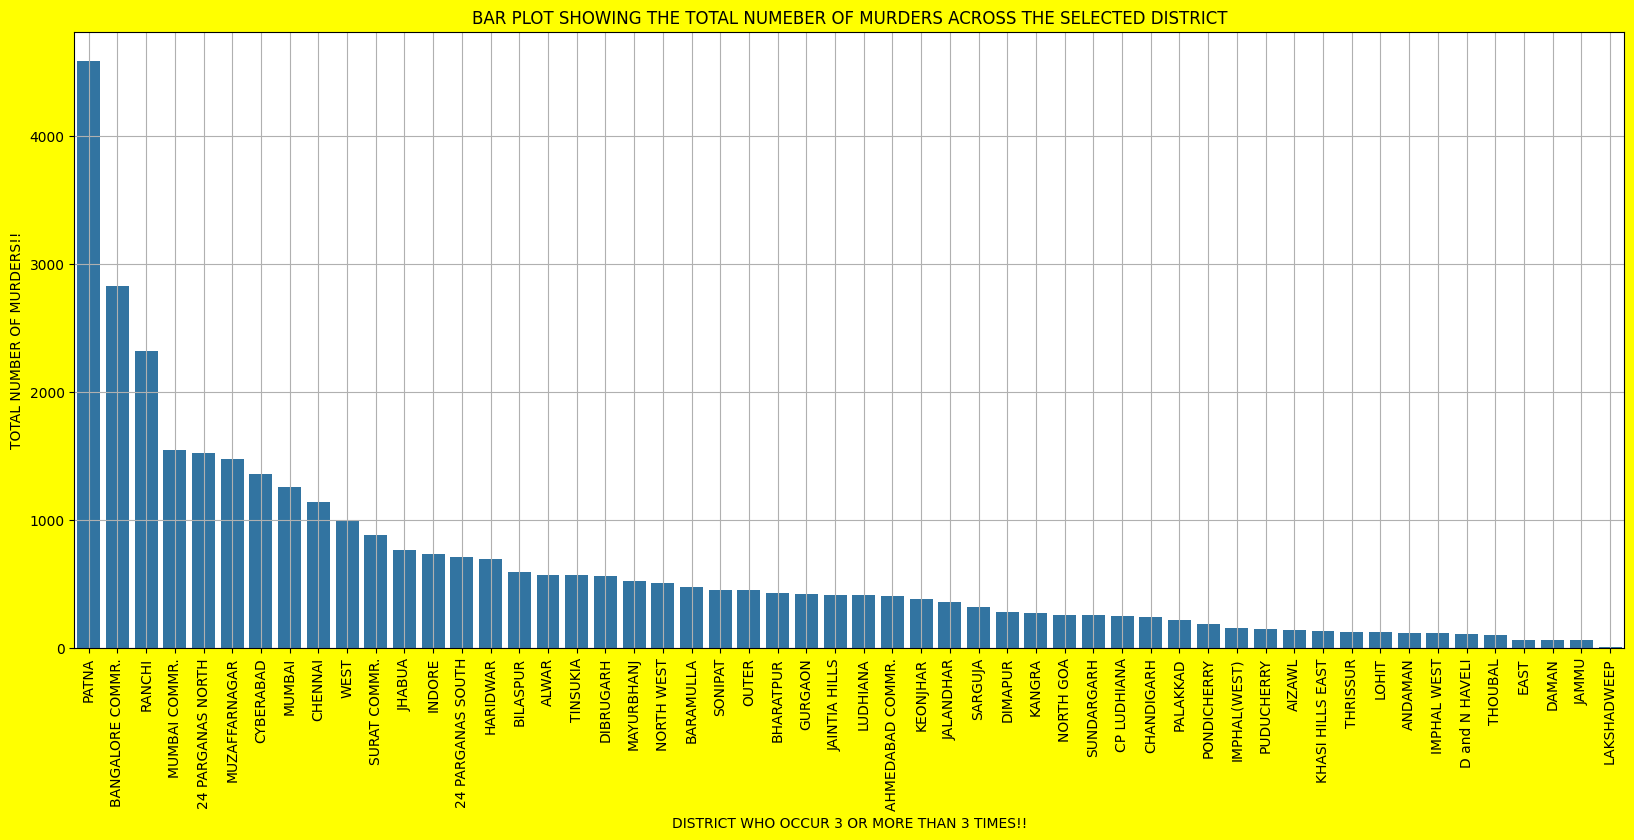

In [94]:
plt.figure(figsize=(20,8),facecolor='Yellow')
sns.barplot(x=data2['DISTRICT'],y=data2['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT")
plt.show()

In [95]:
data3=new_data.groupby(by='YEAR').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

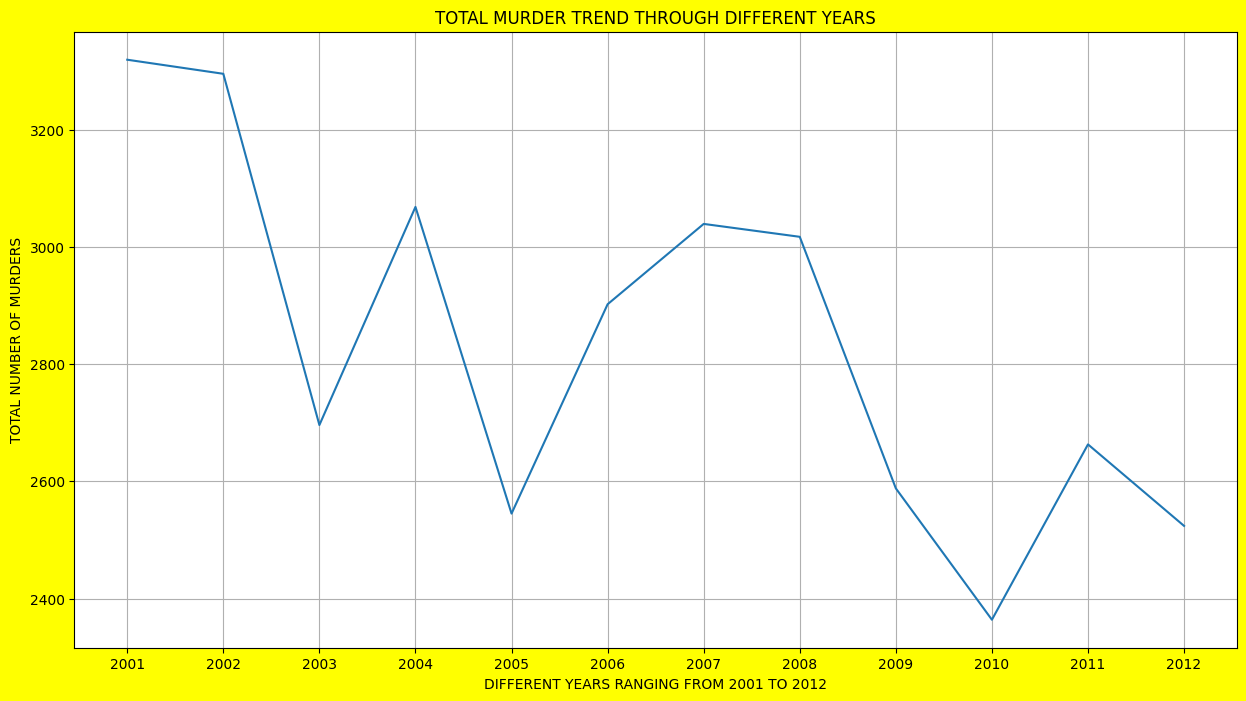

In [96]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.lineplot(x=data3['YEAR'],y=data3['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS RANGING FROM 2001 TO 2012")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.grid()
plt.title("TOTAL MURDER TREND THROUGH DIFFERENT YEARS")
plt.show()

In [100]:
data3.sort_values(by='YEAR',inplace=True)

In [101]:
def chc(df,x):
    mod=[]
    lk=df[x].tolist()
    for i in range(len(lk)):
        if (i==0):
            mod.append(0)
        else:
            mod.append(round((lk[i]-lk[i-1])/lk[i]*100,2))
    return mod
nn=chc(data3,'TOTAL MURDER')
data3['TOTAL CHANGE COMPARED TO THE PREVIUOS YEAR']=nn
    

In [104]:
data3.drop(columns=['STATE/UT','DISTRICT'], inplace=True)

In [107]:
data3.drop(columns = 'TOTAL CHANGE COMPARED TO THE PREVIUOS YEAR', inplace= True)

In [108]:
data3

YEAR  TOTAL MURDER  TOTAL CHANGE COMPARED TO THE PREVIOUS YEAR
0   2001          3319                                        0.00
1   2002          3295                                       -0.73
2   2003          2696                                      -22.22
3   2004          3068                                       12.13
4   2005          2545                                      -20.55
5   2006          2902                                       12.30
6   2007          3039                                        4.51
7   2008          3017                                       -0.73
8   2009          2588                                      -16.58
9   2010          2364                                       -9.48
10  2011          2663                                       11.23
11  2012          2524                                       -5.51

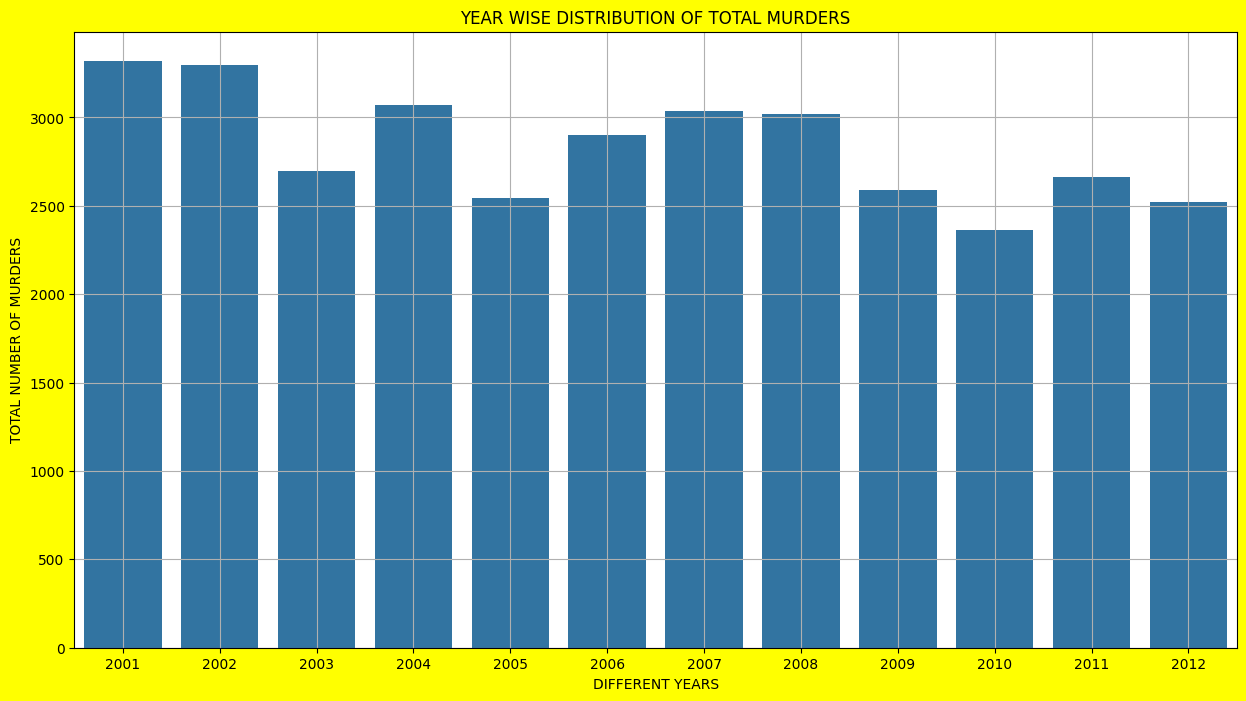

In [109]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.barplot(x=data3['YEAR'],y=data3['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS")
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.title("YEAR WISE DISTRIBUTION OF TOTAL MURDERS")
plt.grid()
plt.show()

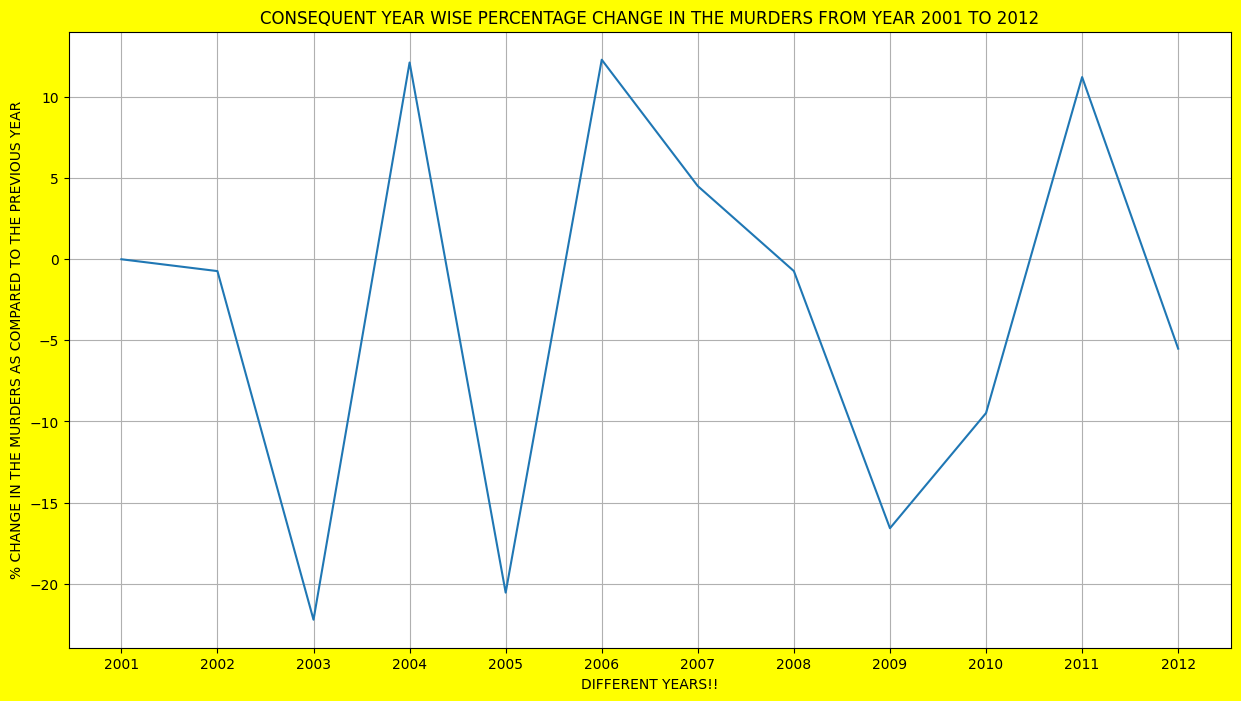

In [110]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.lineplot(x=data3['YEAR'],y=data3['TOTAL CHANGE COMPARED TO THE PREVIOUS YEAR'])
plt.xlabel("DIFFERENT YEARS!!")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("% CHANGE IN THE MURDERS AS COMPARED TO THE PREVIOUS YEAR")
plt.title("CONSEQUENT YEAR WISE PERCENTAGE CHANGE IN THE MURDERS FROM YEAR 2001 TO 2012")
plt.grid()
plt.show()

In [111]:
pt = pd.pivot_table(data=new_data,values='TOTAL MURDER',index='YEAR',columns='DISTRICT')

In [112]:
pt=pt.fillna(0)

In [114]:
pt.T

YEAR                2001   2002   2003   2004   2005   2006   2007   2008  \
DISTRICT                                                                    
24 PARGANAS NORTH  202.0  204.0  193.0  177.0  168.0  154.0  194.0    0.0   
24 PARGANAS SOUTH    0.0    0.0    0.0    0.0    0.0    0.0    0.0  239.0   
AHMEDABAD COMMR.     0.0  222.0   90.0   92.0    0.0    0.0    0.0    0.0   
AIZAWL              12.0    0.0   14.0   10.0    4.0    7.0   18.0   12.0   
ALWAR                0.0    0.0    0.0    0.0    0.0   75.0   89.0  101.0   
ANDAMAN             13.0   14.0   16.0   13.0   14.0    3.0    0.0    8.0   
BANGALORE COMMR.   221.0  201.0  216.0  214.0  242.0  218.0  246.0  253.0   
BARAMULLA          144.0  121.0    0.0   86.0   78.0    0.0   47.0    0.0   
BHARATPUR            0.0   87.0    0.0   92.0   91.0   75.0    0.0    0.0   
BILASPUR             0.0    0.0   95.0    0.0   94.0    0.0    0.0  112.0   
CHANDIGARH          15.0   31.0   21.0   22.0   18.0   12.0   19.0   17.0   
CHENNAI             91.0    0.0    0.0    0.0  123.0  131.0  145.0  100.0   
CP LUDHIANA          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
CYBERABAD            0.0    0.0    0.0    0.0    0.0  193.0  186.0  197.0   
D and N HAVELI       3.0   11.0   11.0   11.0    7.0    9.0   10.0    9.0   
DAMAN                6.0    7.0    6.0    2.0    4.0    6.0   12.0    2.0   
DIBRUGARH          110.0    0.0  107.0  125.0  113.0  104.0    0.0    0.0   
DIMAPUR             36.0   32.0    0.0   22.0   23.0    0.0   30.0   64.0   
EAST                13.0    6.0    7.0    0.0    5.0   10.0    0.0    5.0   
GURGAON              0.0    0.0   62.0    0.0    0.0   93.0   93.0    0.0   
HARIDWAR            94.0   75.0   75.0   56.0   65.0    0.0   55.0   74.0   
IMPHAL WEST          0.0    0.0    0.0    0.0    0.0    0.0   61.0    0.0   
IMPHAL(WEST)        44.0   32.0   28.0    0.0   49.0    0.0    0.0    0.0   
INDORE               0.0    0.0    0.0    0.0    0.0    0.0  111.0  125.0   
JAINTIA HILLS        0.0    0.0   52.0    0.0   43.0   51.0   43.0   38.0   
JALANDHAR           74.0    0.0    0.0   74.0   63.0   80.0   63.0    0.0   
JAMMU                0.0    0.0    0.0    0.0    0.0    0.0    0.0   31.0   
JHABUA             124.0  133.0  119.0  139.0  129.0  117.0    0.0    0.0   
KANGRA              24.0   28.0   38.0    0.0   21.0   19.0   22.0   19.0   
KEONJHAR             0.0    0.0    0.0    0.0    0.0   84.0    0.0   91.0   
KHASI HILLS EAST    50.0   48.0    0.0   33.0    0.0    0.0    0.0    0.0   
LAKSHADWEEP          1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
LOHIT               16.0   14.0   16.0   10.0   14.0    0.0   17.0   11.0   
LUDHIANA            74.0   68.0   64.0    0.0    0.0    0.0   63.0   73.0   
MAYURBHANJ          74.0    0.0    0.0   77.0    0.0   84.0   98.0    0.0   
MUMBAI             295.0  252.0  242.0  253.0  212.0    0.0    0.0    0.0   
MUMBAI COMMR.        0.0    0.0    0.0    0.0    0.0  239.0  230.0  210.0   
MUZAFFARNAGAR      324.0  287.0    0.0  253.0    0.0  230.0  213.0  168.0   
NORTH GOA           22.0   18.0   22.0   23.0    0.0   24.0    0.0   26.0   
NORTH WEST         134.0  135.0  106.0  129.0    0.0    0.0    0.0    0.0   
OUTER                0.0    0.0    0.0    0.0    0.0    0.0  102.0    0.0   
PALAKKAD             0.0    0.0   52.0    0.0    0.0   44.0    0.0    0.0   
PATNA              434.0  472.0  484.0  542.0  436.0  338.0  317.0  341.0   
PONDICHERRY         25.0   29.0   29.0   25.0   19.0   28.0   30.0    0.0   
PUDUCHERRY           0.0    0.0    0.0    0.0    0.0    0.0    0.0   30.0   
RANCHI             243.0  270.0  250.0  270.0  239.0  253.0  203.0  209.0   
SARGUJA            105.0  101.0    0.0  111.0    0.0    0.0    0.0    0.0   
SONIPAT             73.0   82.0   62.0   67.0    0.0    0.0    0.0   84.0   
SUNDARGARH           0.0   87.0   83.0    0.0   82.0    0.0    0.0    0.0   
SURAT COMMR.        98.0    0.0    0.0    0.0   86.0  103.0  108.0   97.0

In [129]:
pt.max().sort_values(ascending=False)

DISTRICT
PATNA                542.0
MUZAFFARNAGAR        324.0
MUMBAI               295.0
RANCHI               270.0
BANGALORE COMMR.     266.0
24 PARGANAS SOUTH    247.0
MUMBAI COMMR.        239.0
24 PARGANAS NORTH    229.0
AHMEDABAD COMMR.     222.0
CYBERABAD            213.0
CHENNAI              180.0
BARAMULLA            144.0
TINSUKIA             143.0
JHABUA               139.0
WEST                 136.0
INDORE               135.0
NORTH WEST           135.0
DIBRUGARH            125.0
BILASPUR             112.0
SARGUJA              111.0
KEONJHAR             109.0
SURAT COMMR.         108.0
ALWAR                104.0
MAYURBHANJ           103.0
OUTER                102.0
HARIDWAR              94.0
GURGAON               93.0
BHARATPUR             92.0
CP LUDHIANA           90.0
SUNDARGARH            87.0
SONIPAT               86.0
JALANDHAR             80.0
LUDHIANA              74.0
DIMAPUR               64.0
IMPHAL WEST           61.0
PALAKKAD              52.0
JAINTIA HILLS      

`Note` :
`Patna` has the most murders recorded.

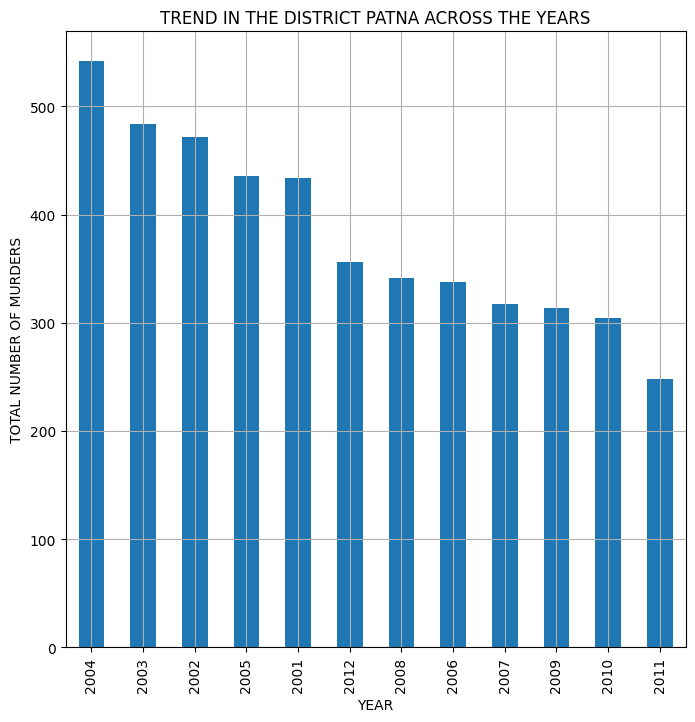

In [130]:
pt['PATNA'].sort_values(ascending=False).plot(kind='bar',figsize=(8,8))
plt.ylabel("TOTAL NUMBER OF MURDERS")
plt.title("TREND IN THE DISTRICT PATNA ACROSS THE YEARS")
plt.grid()
plt.show()

In [131]:
pt1=pt.columns.tolist()

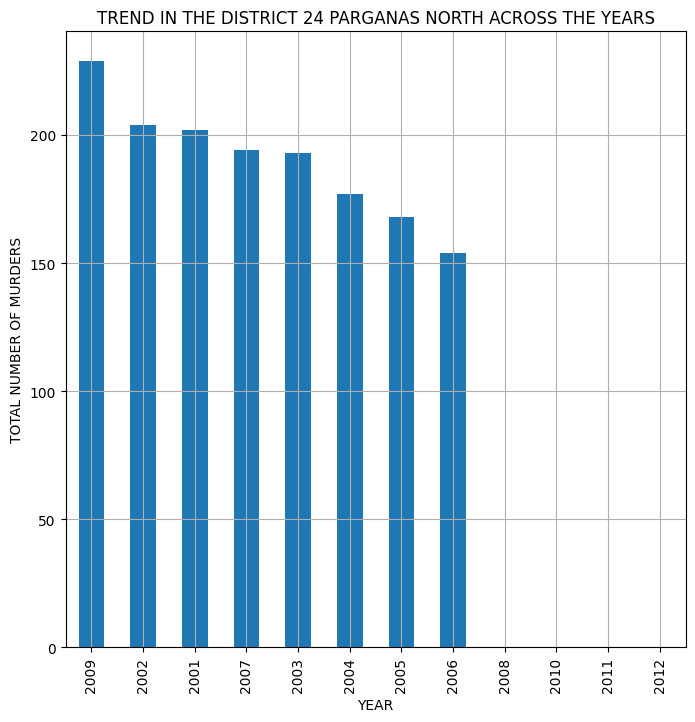

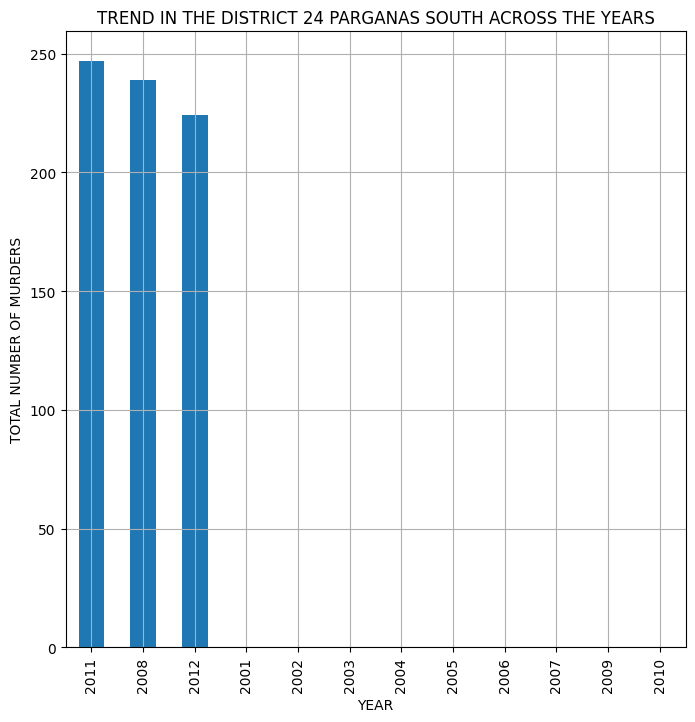

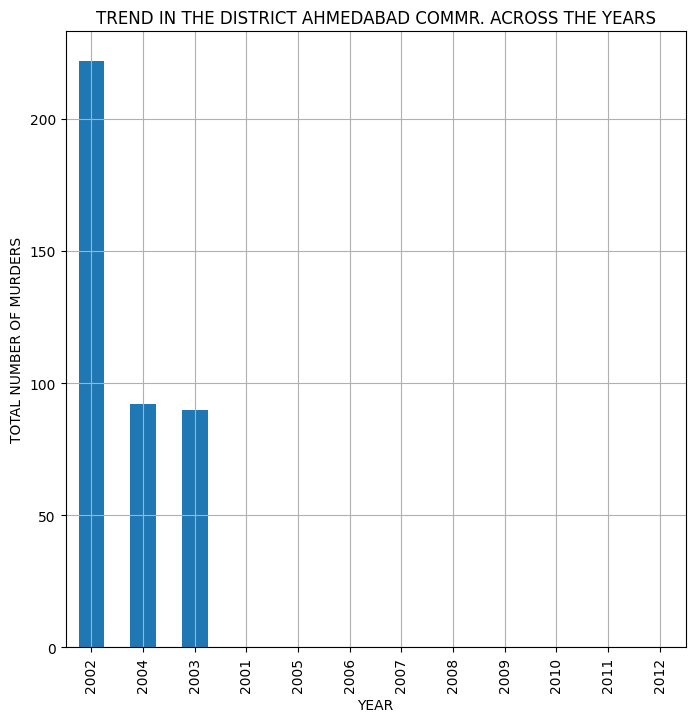

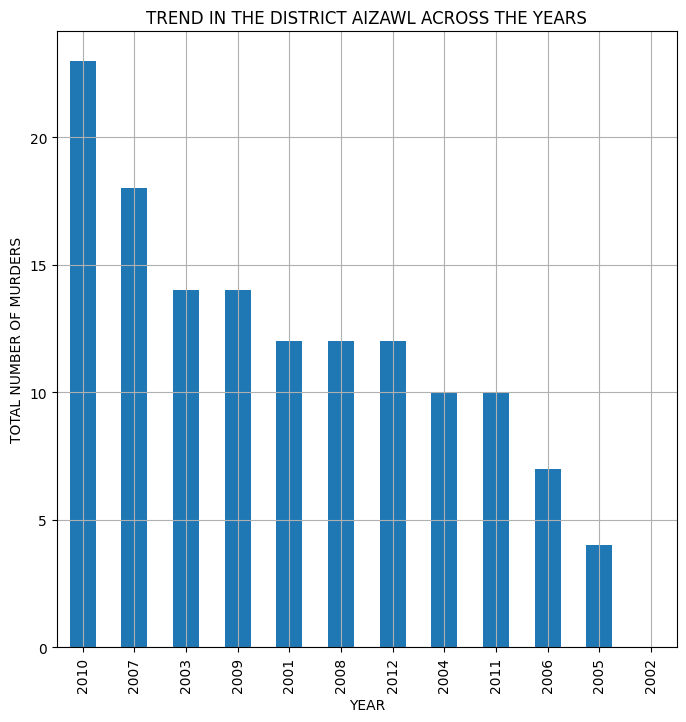

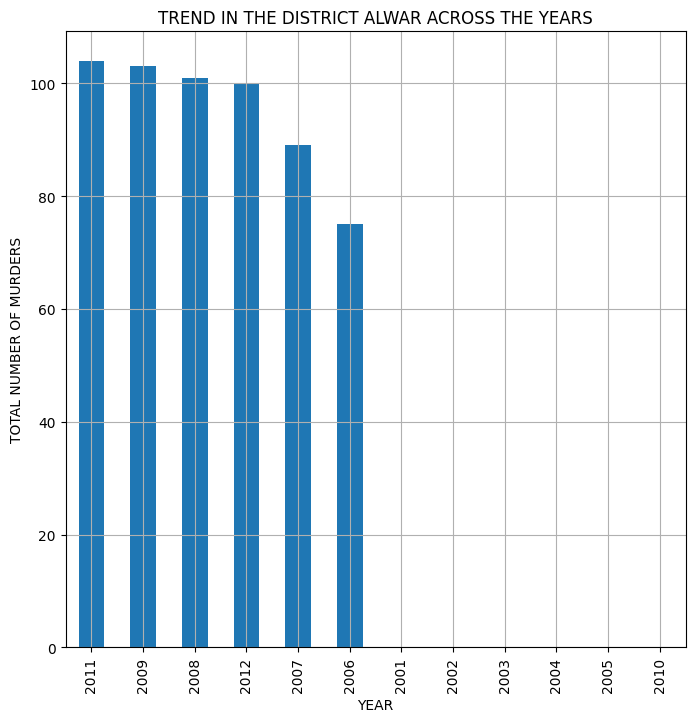

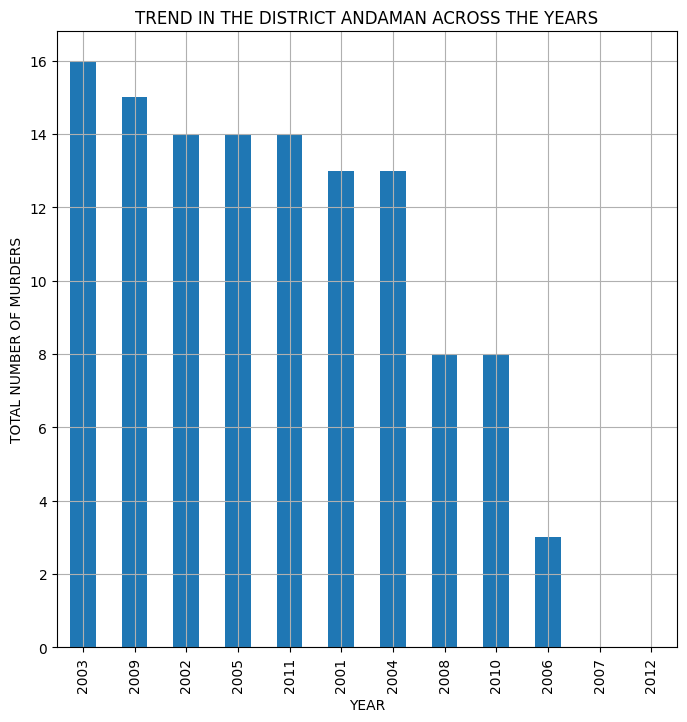

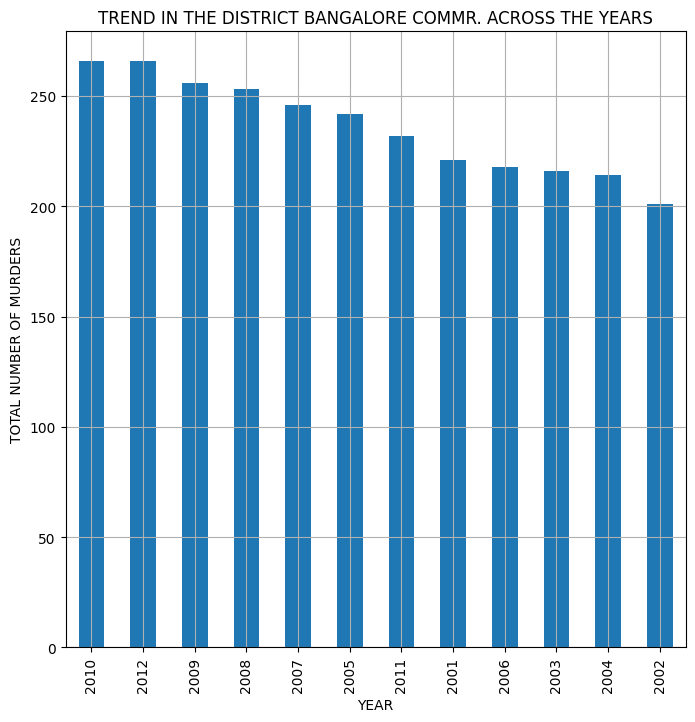

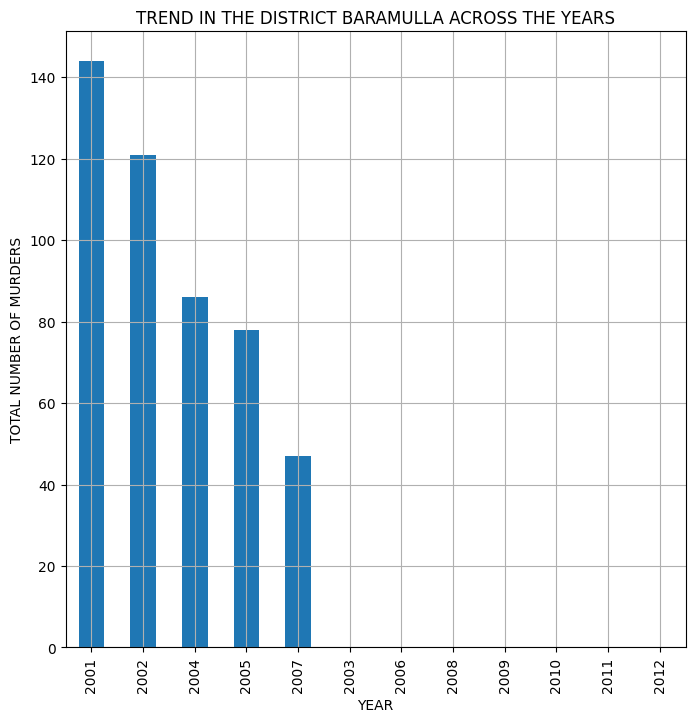

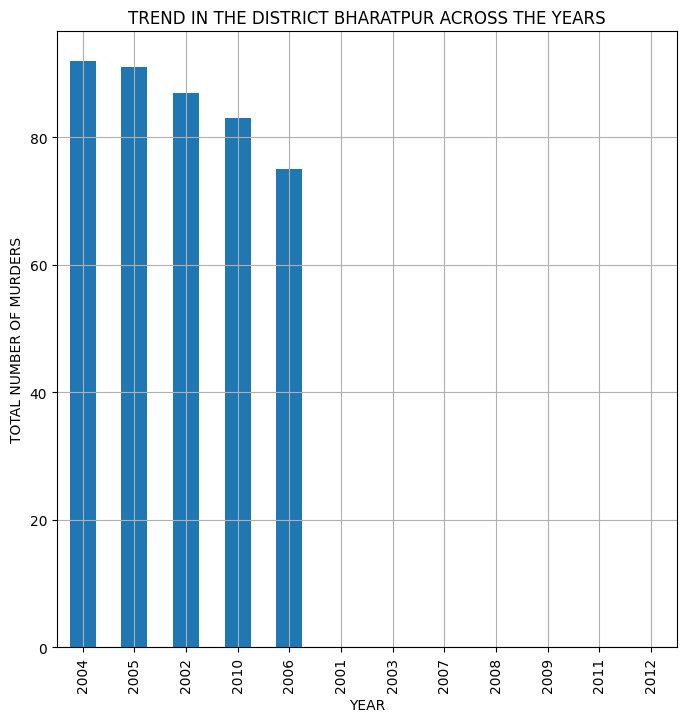

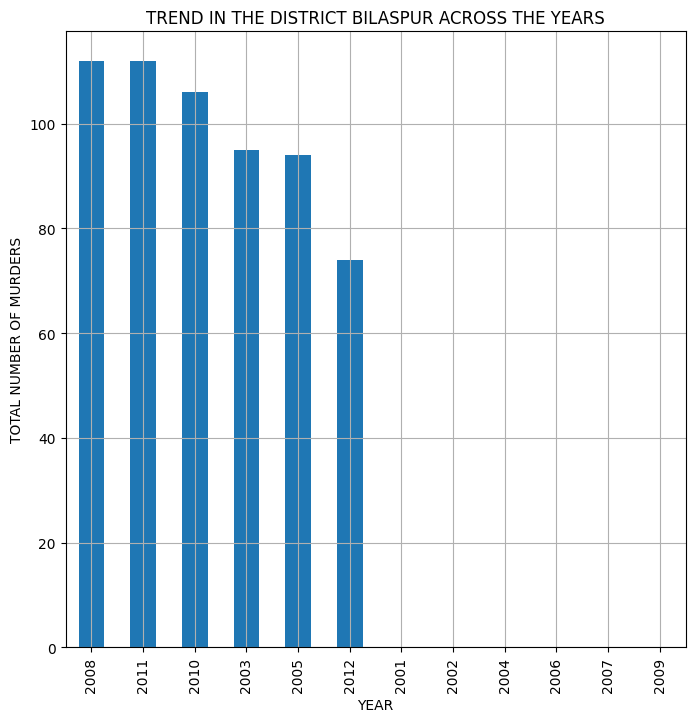

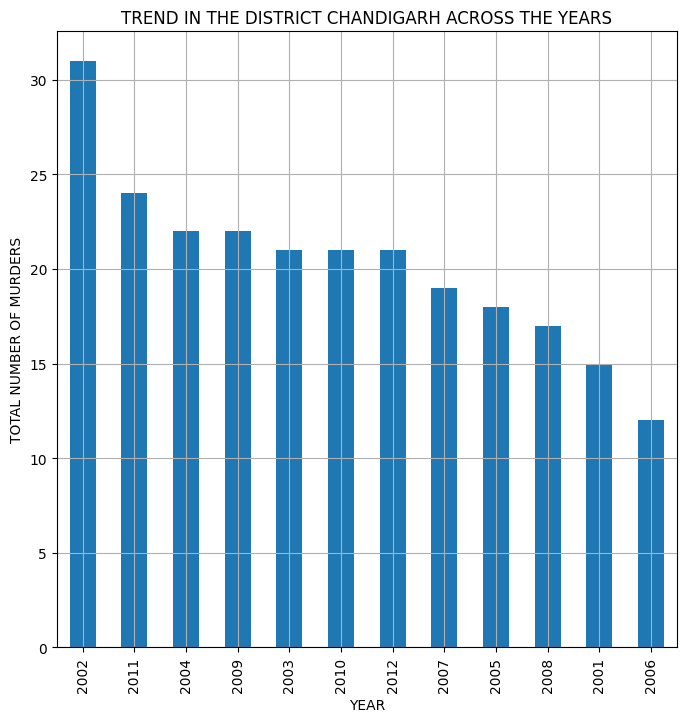

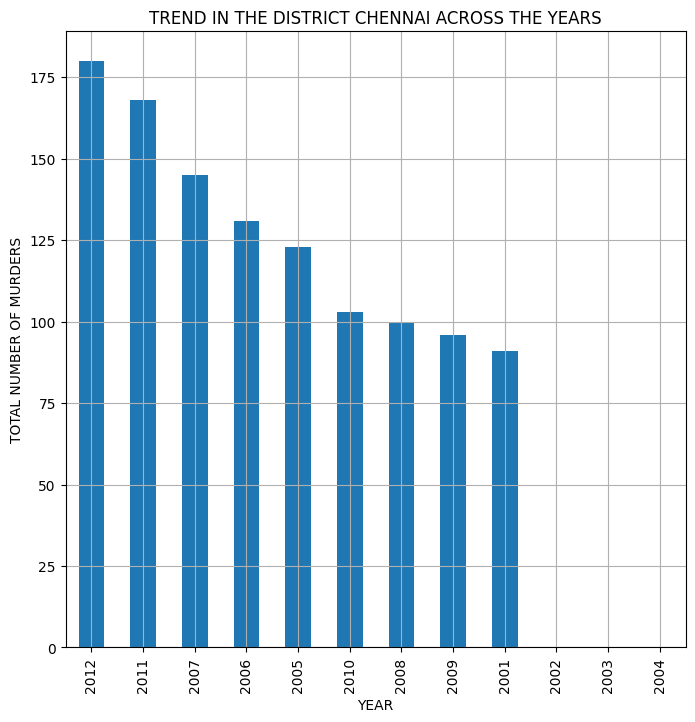

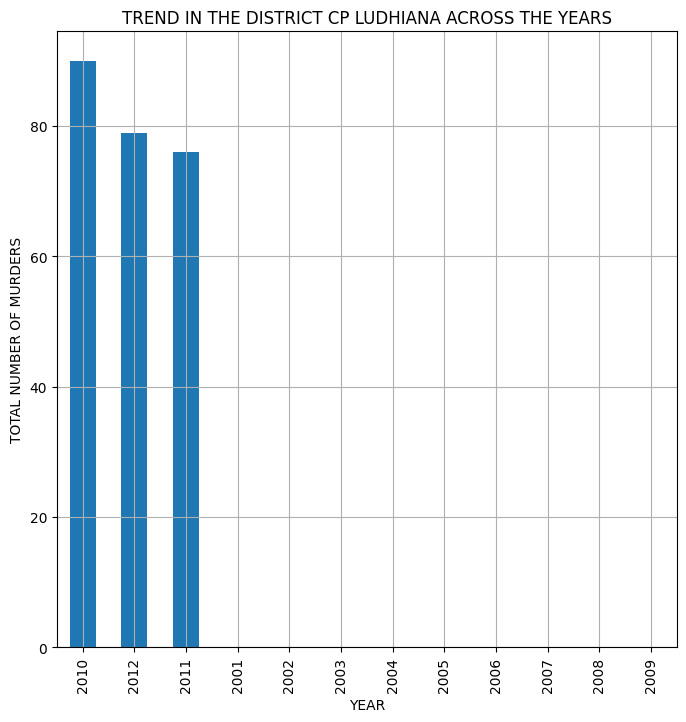

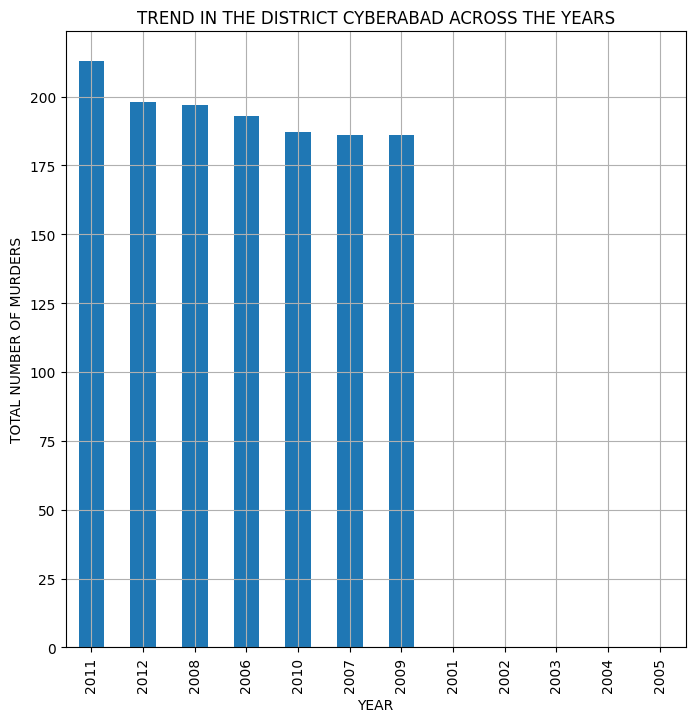

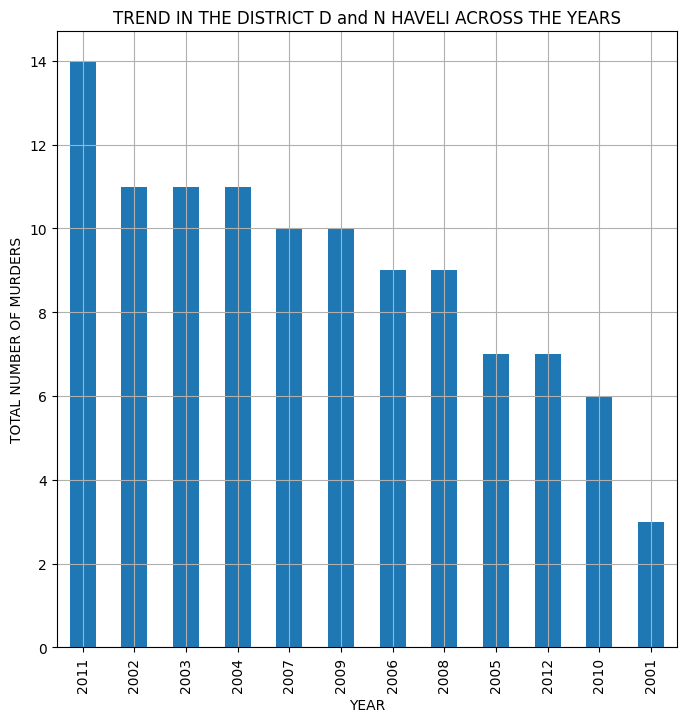

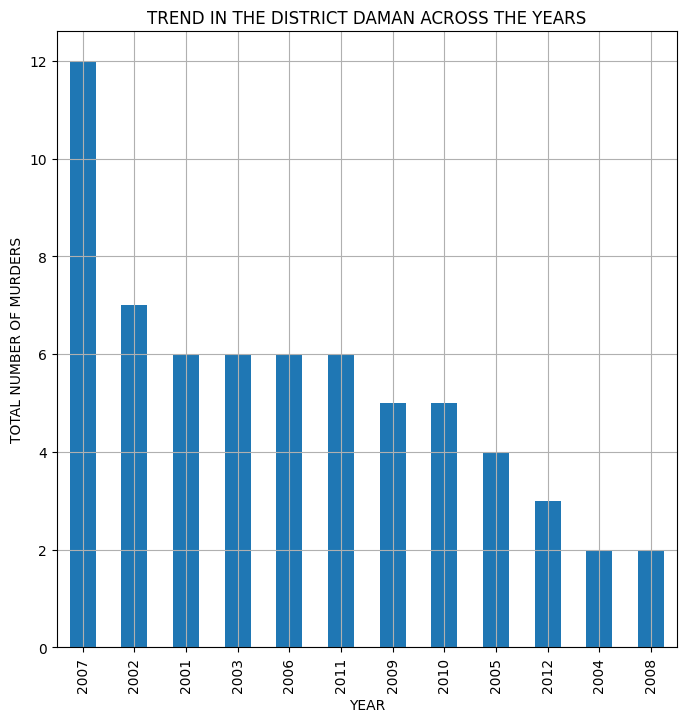

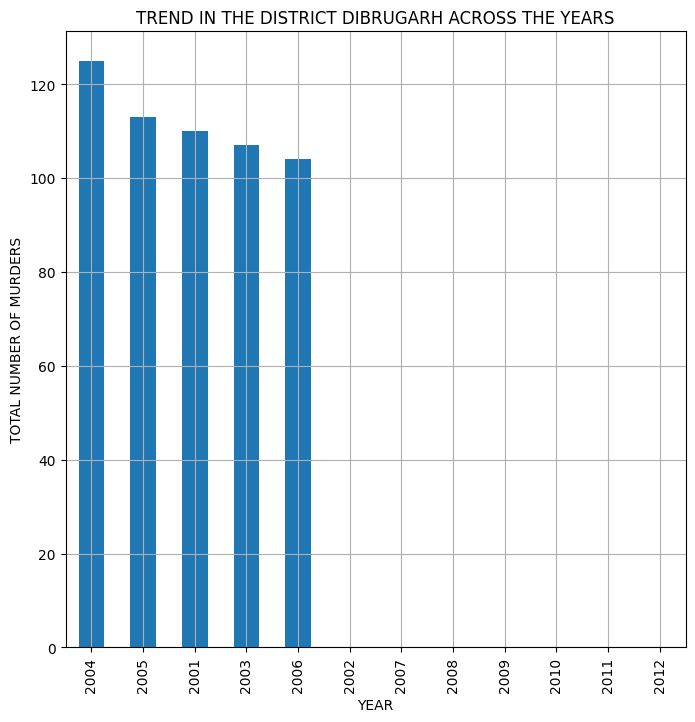

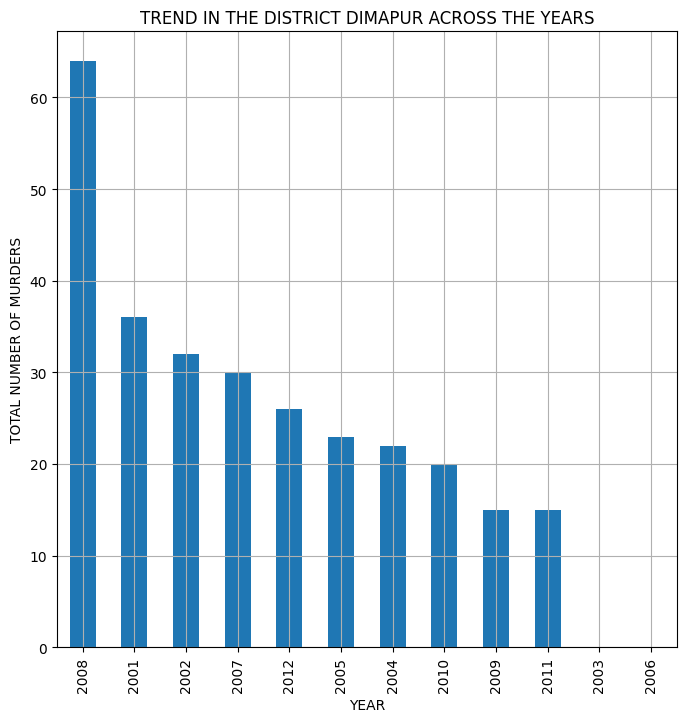

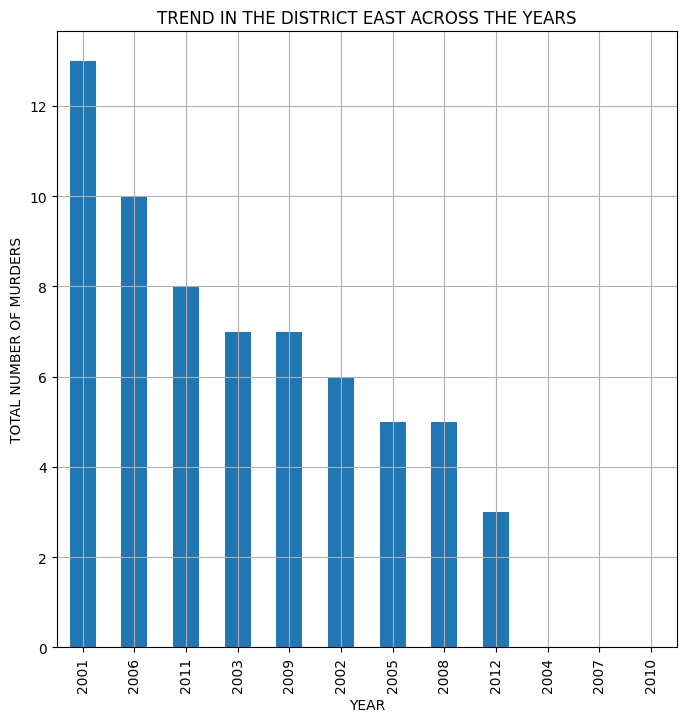

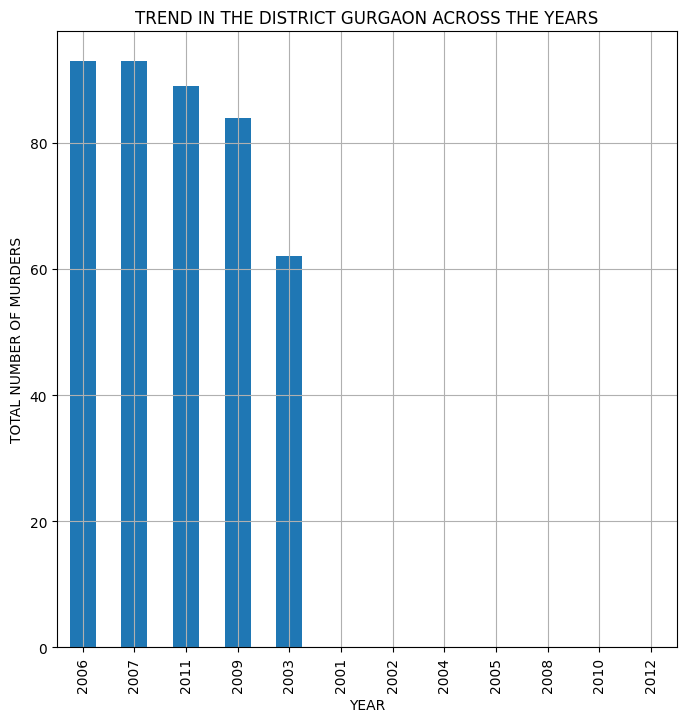

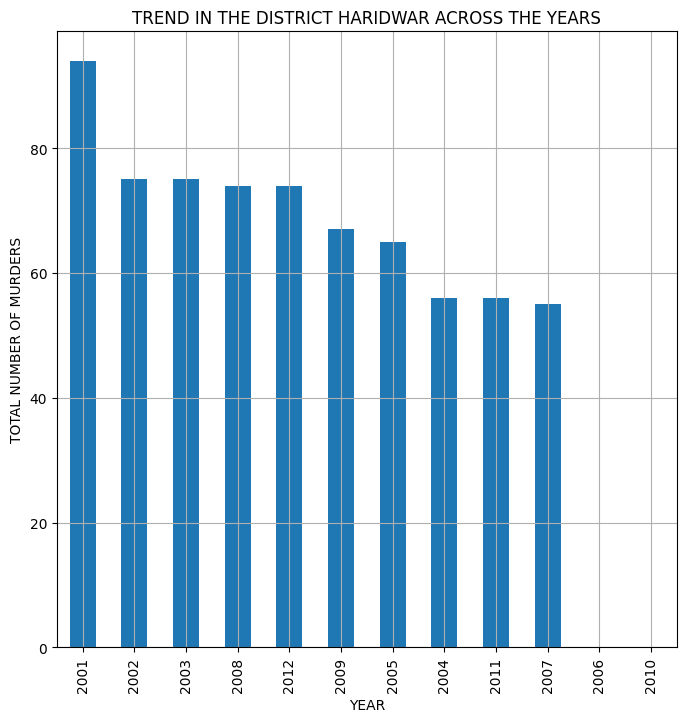

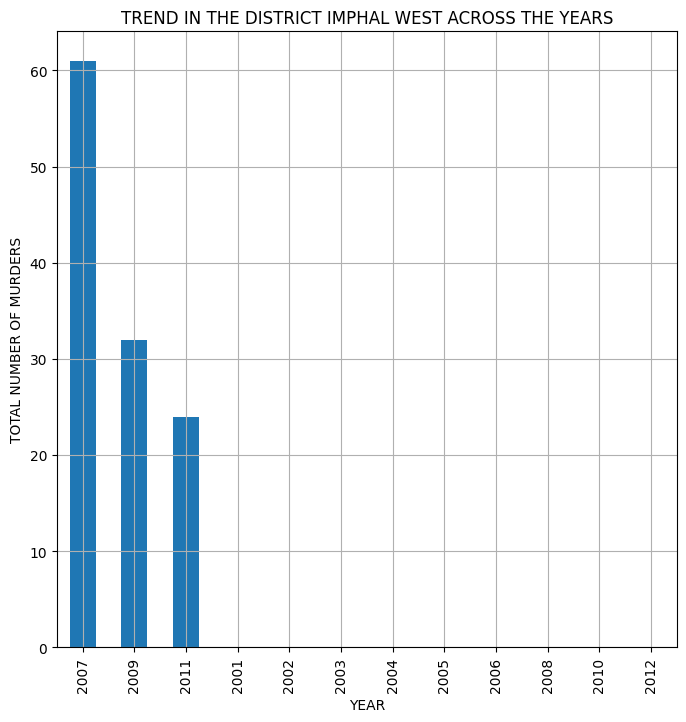

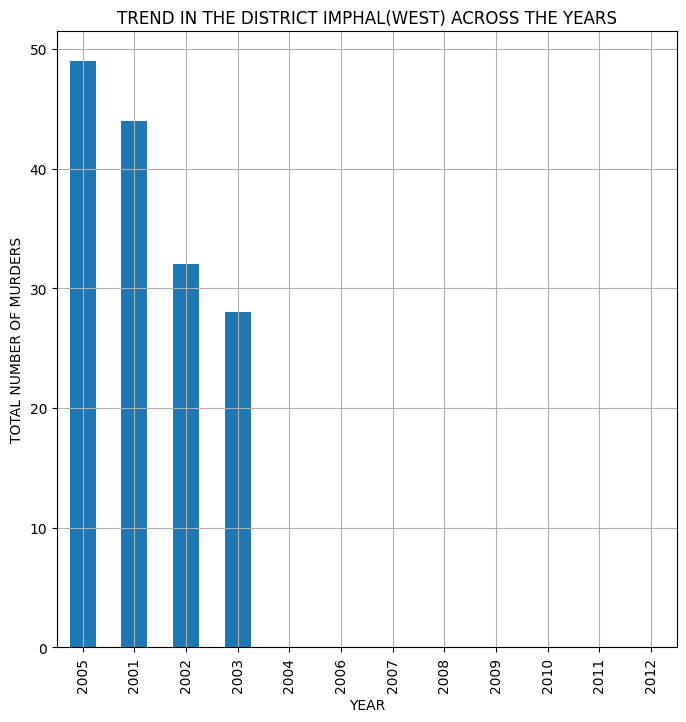

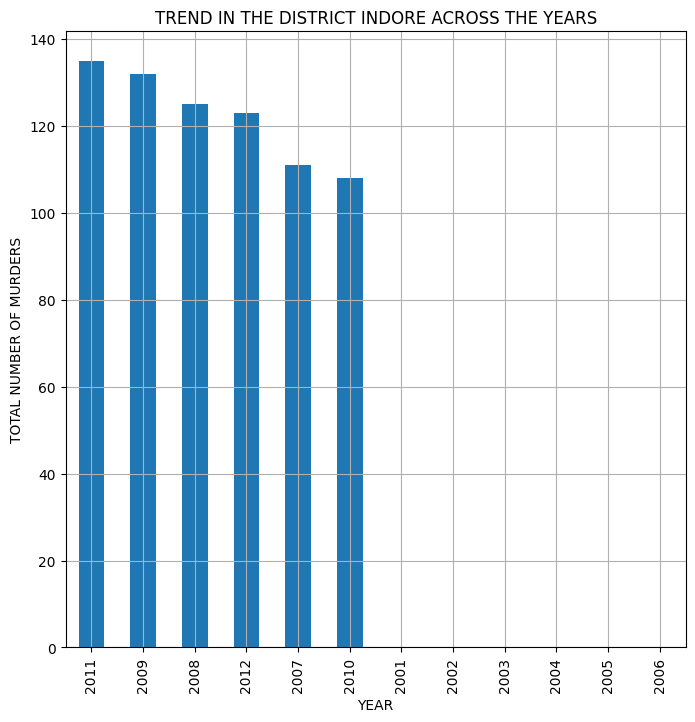

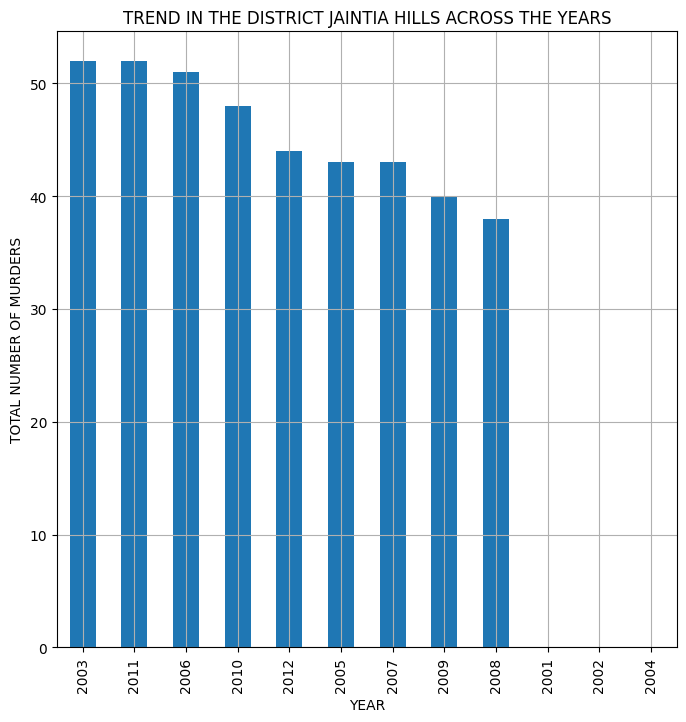

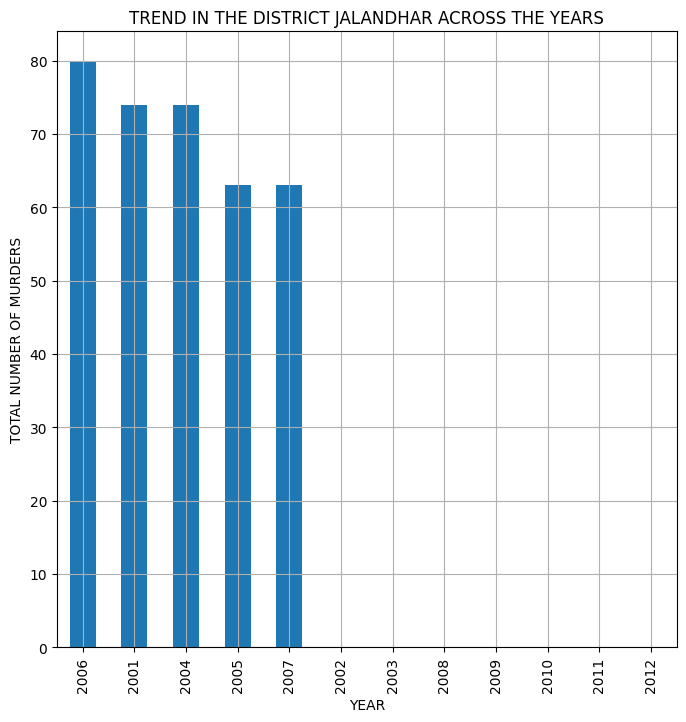

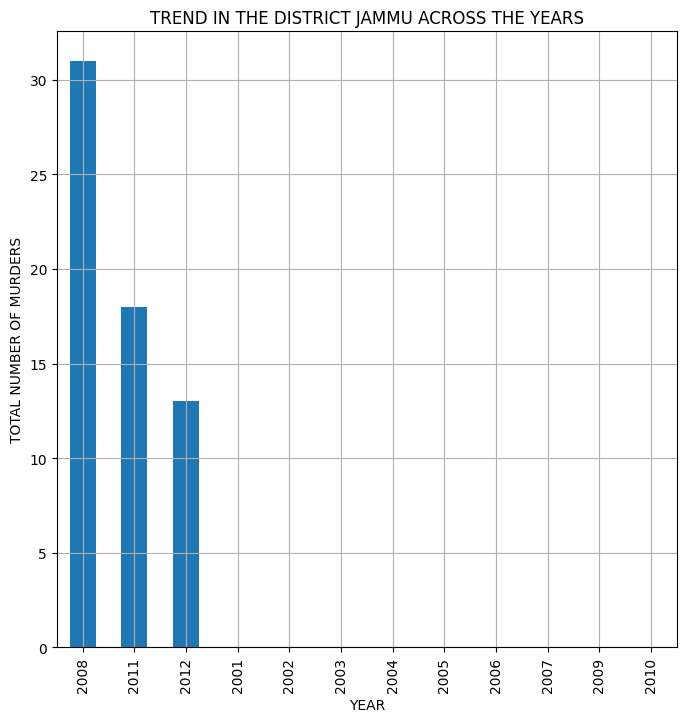

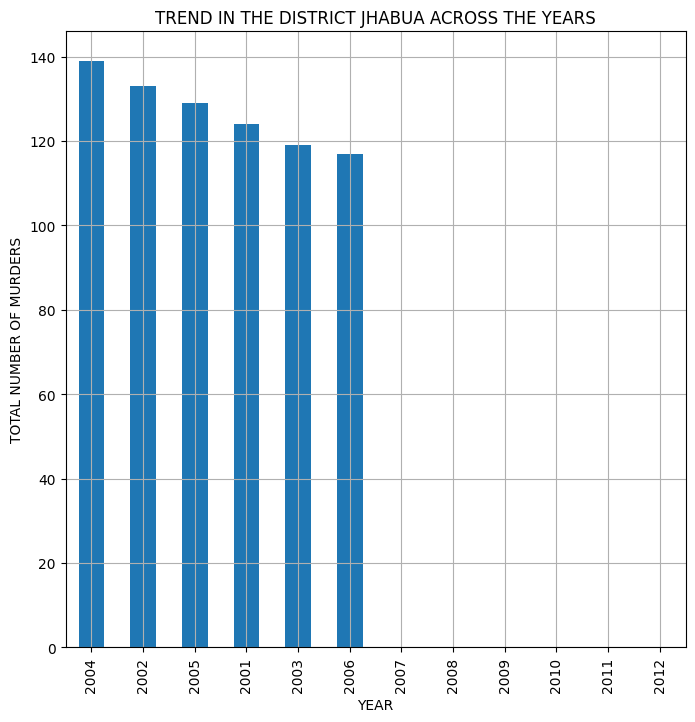

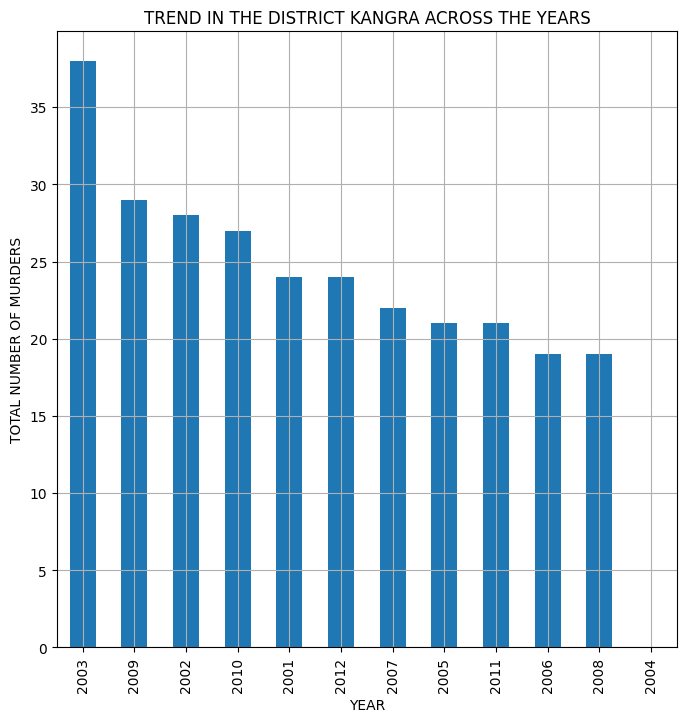

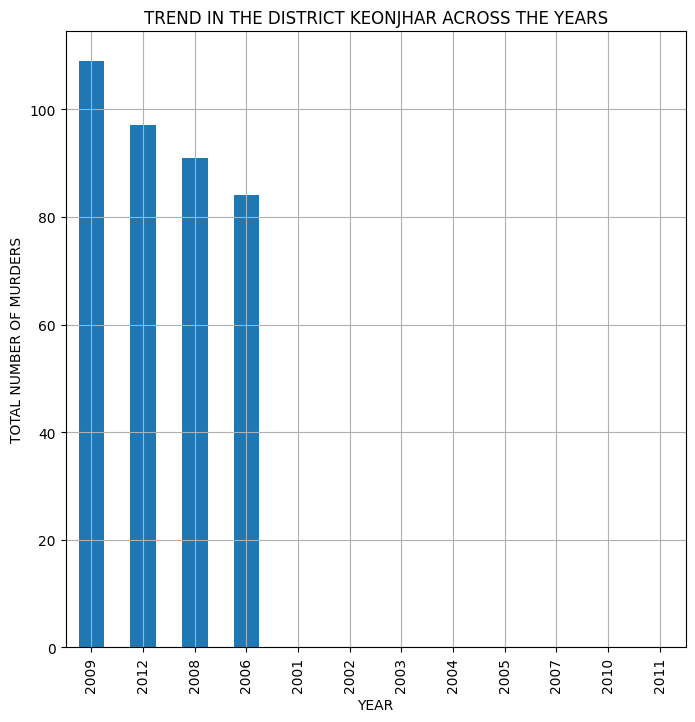

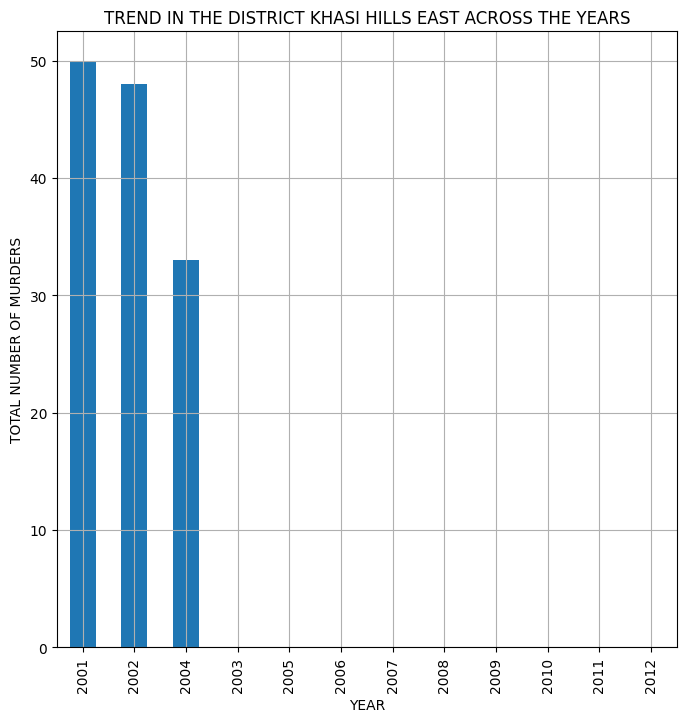

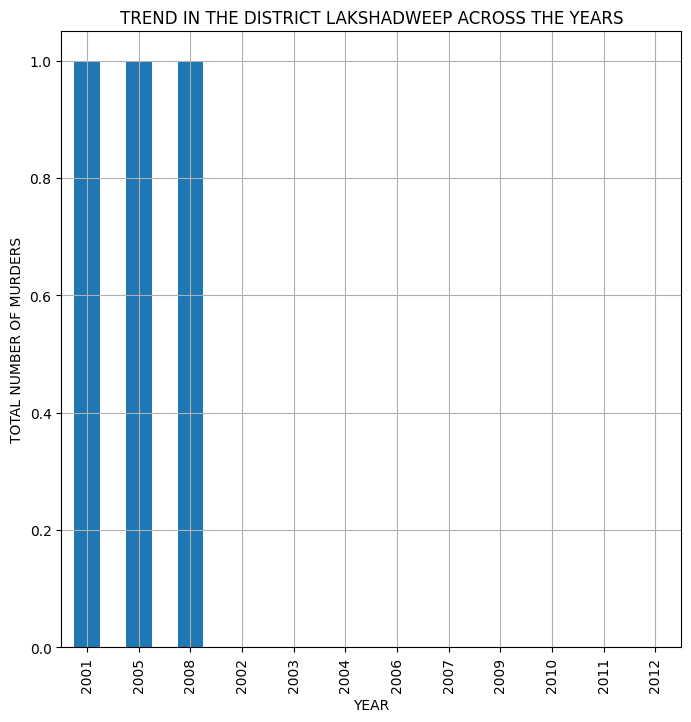

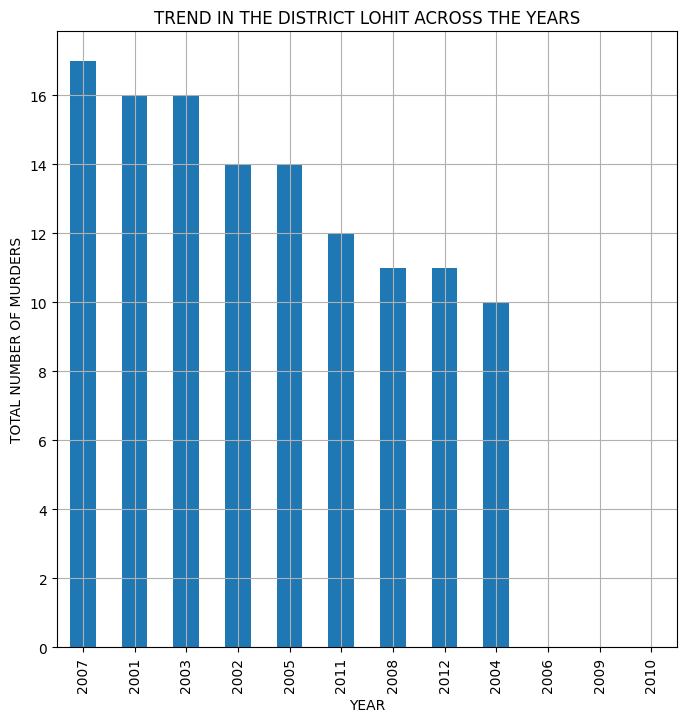

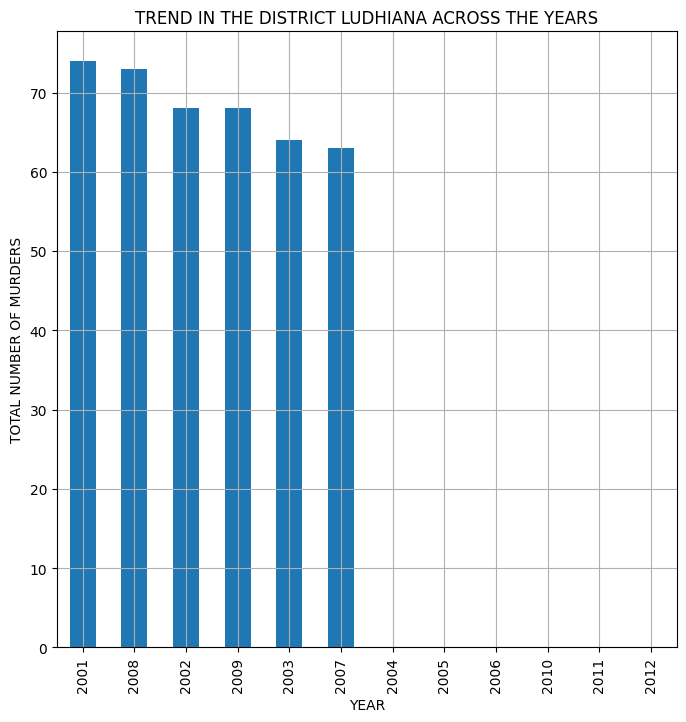

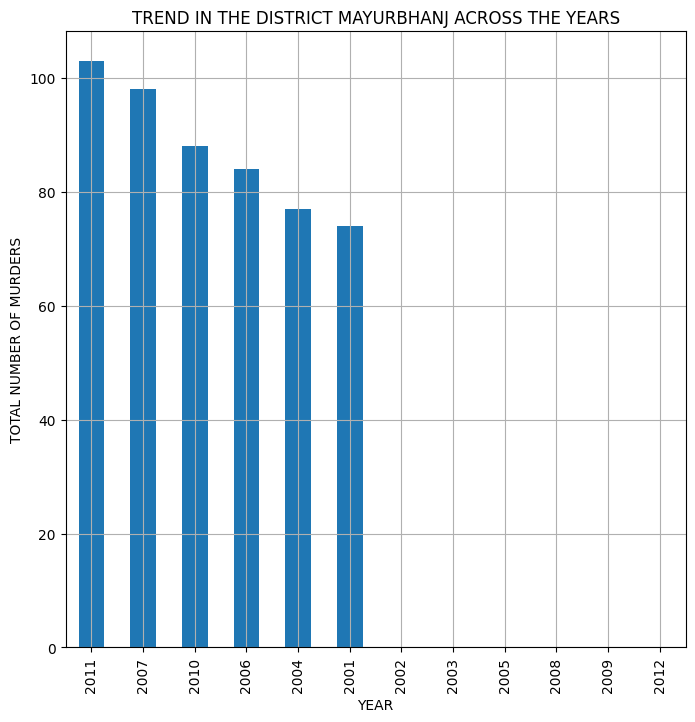

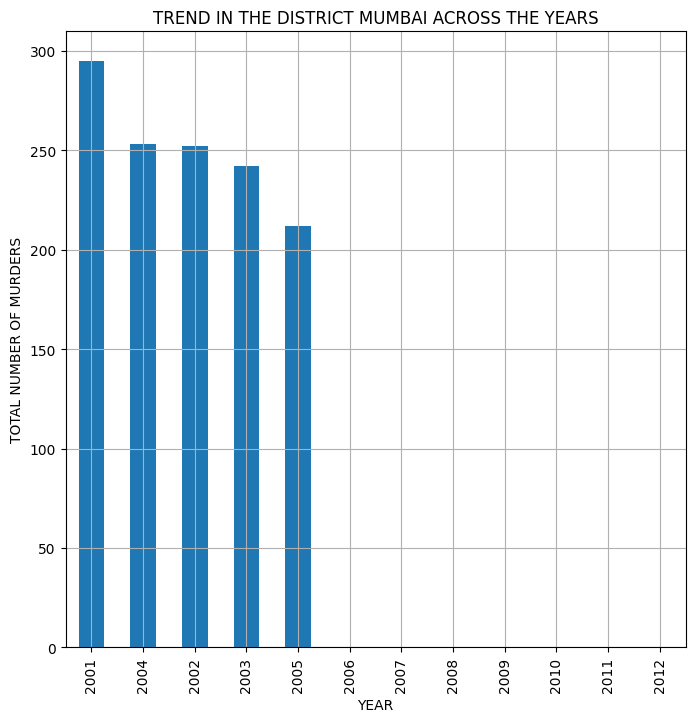

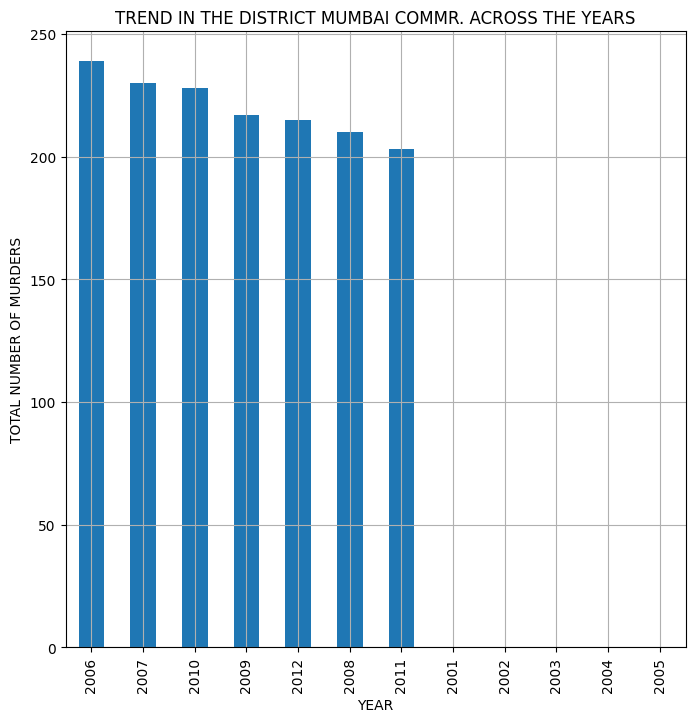

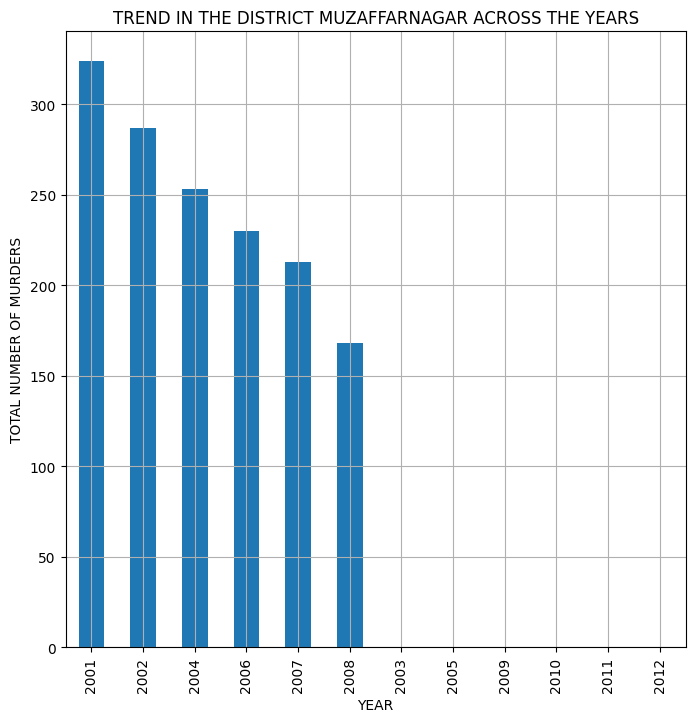

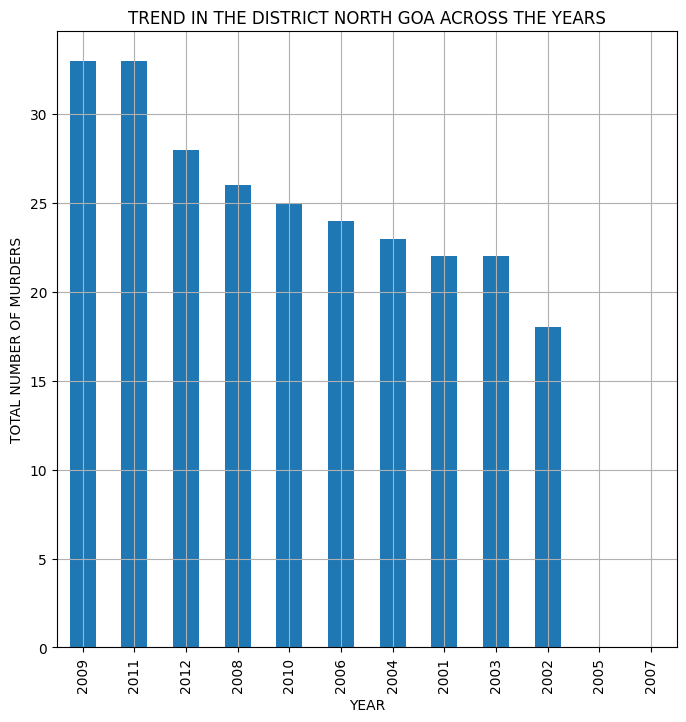

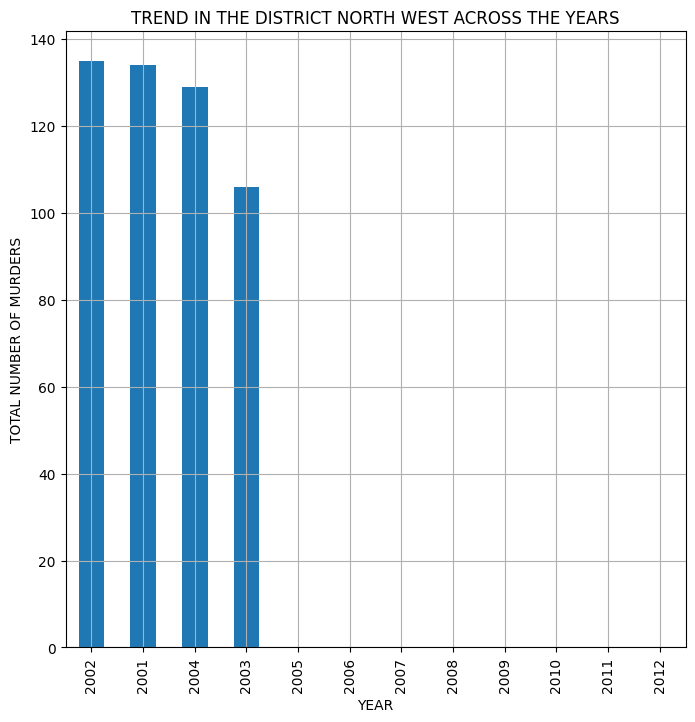

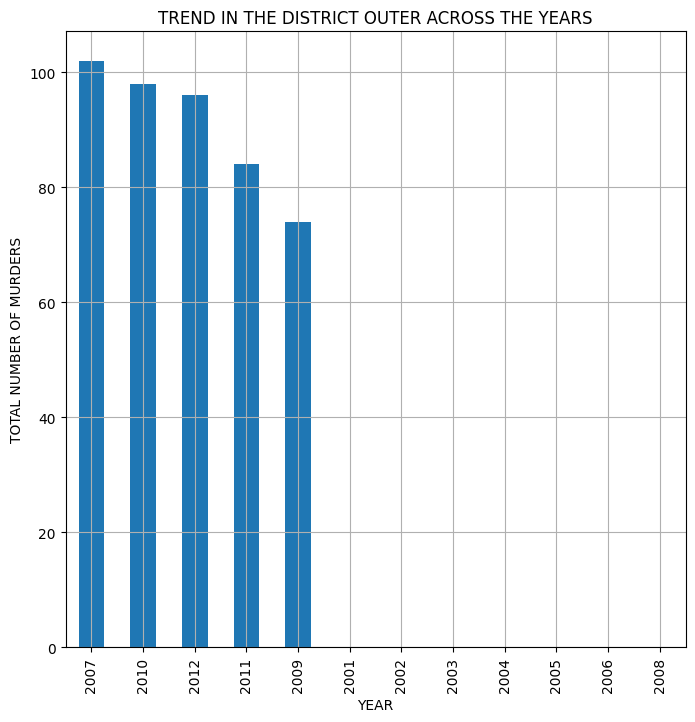

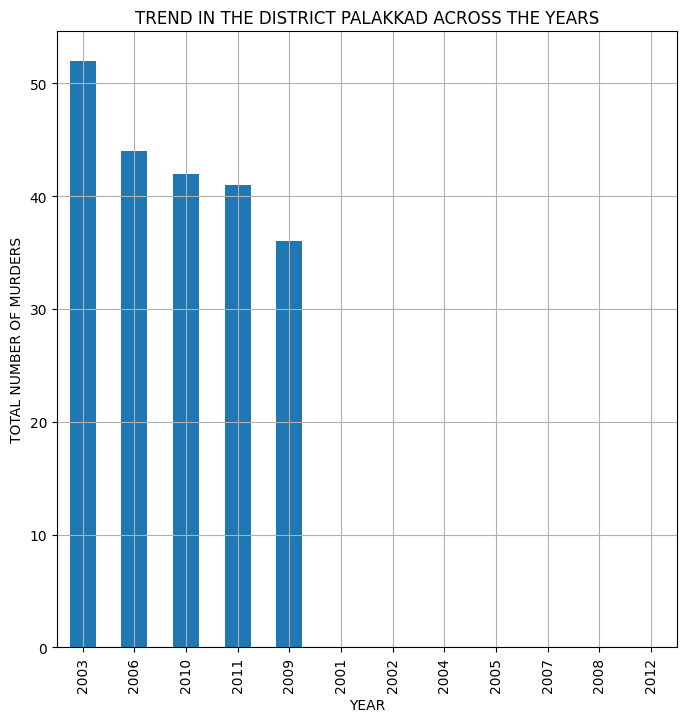

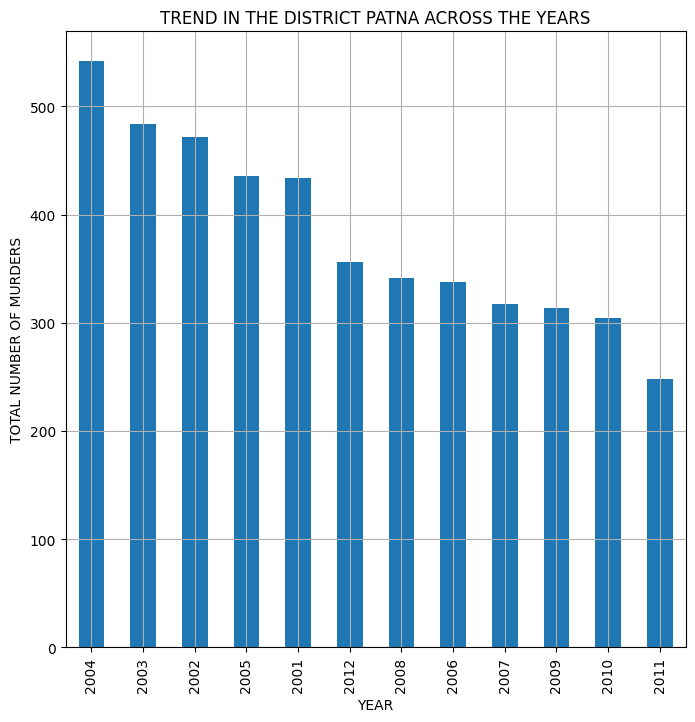

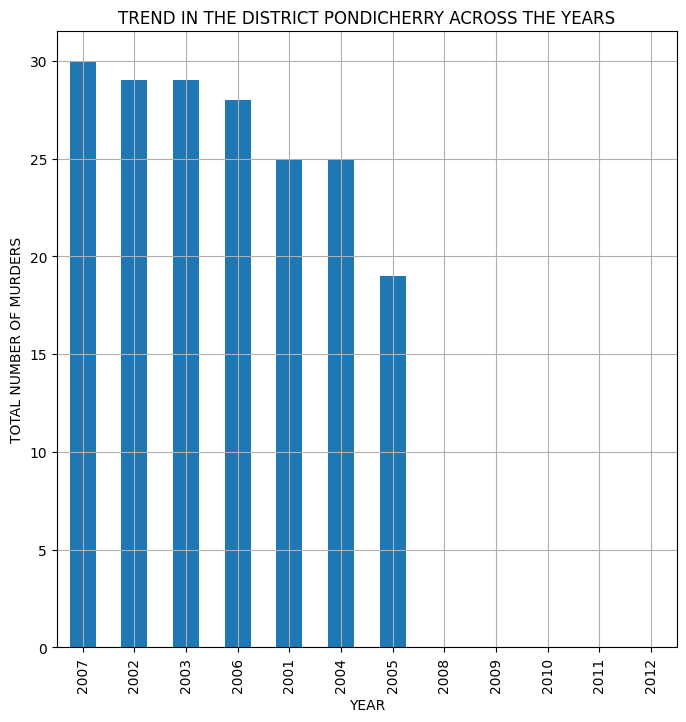

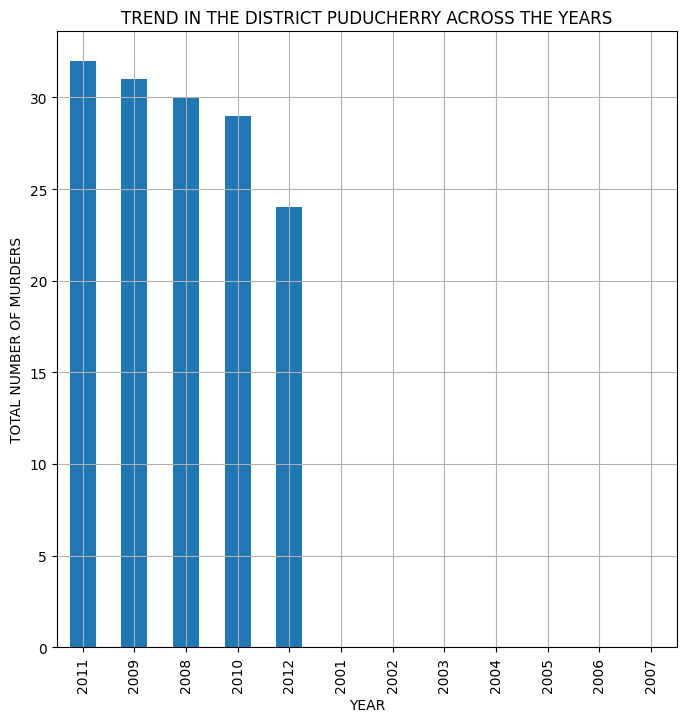

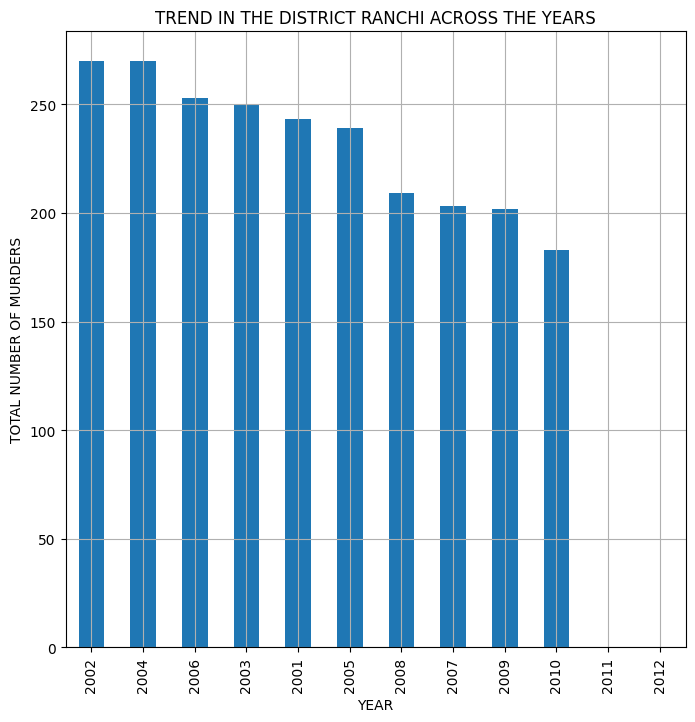

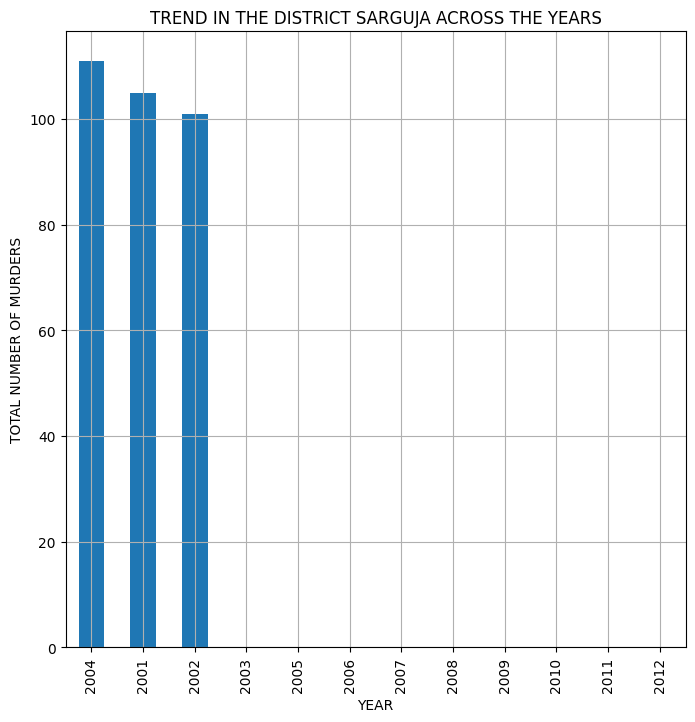

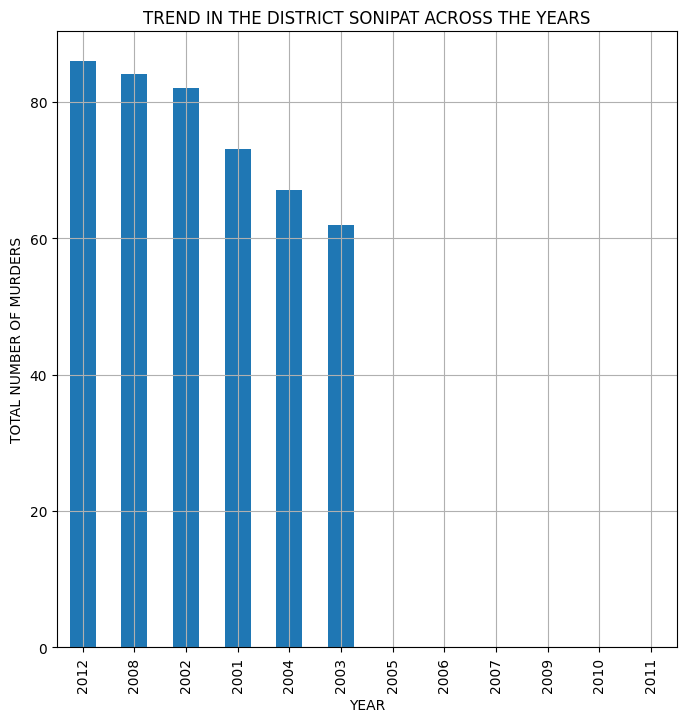

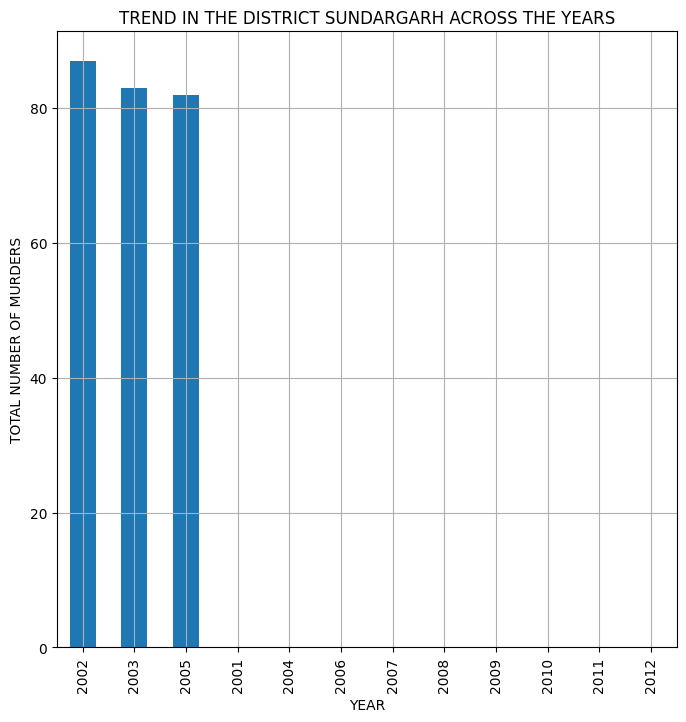

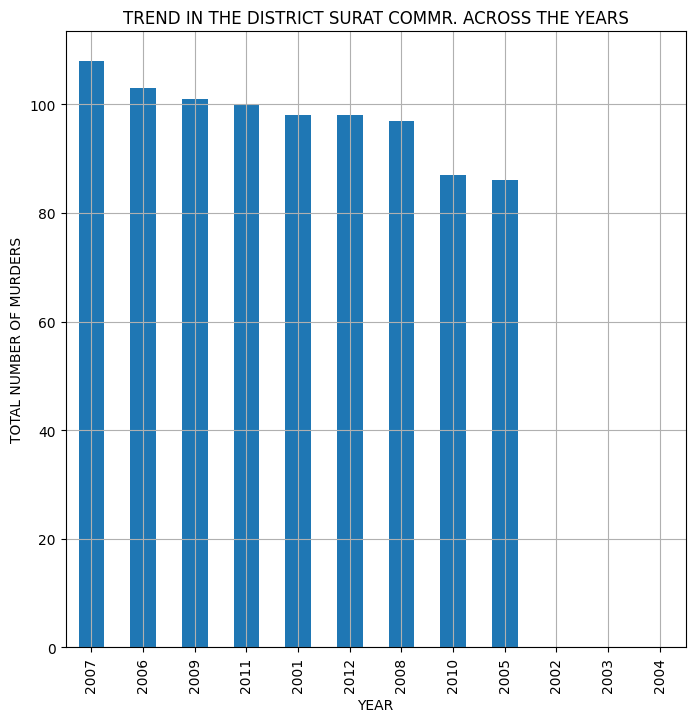

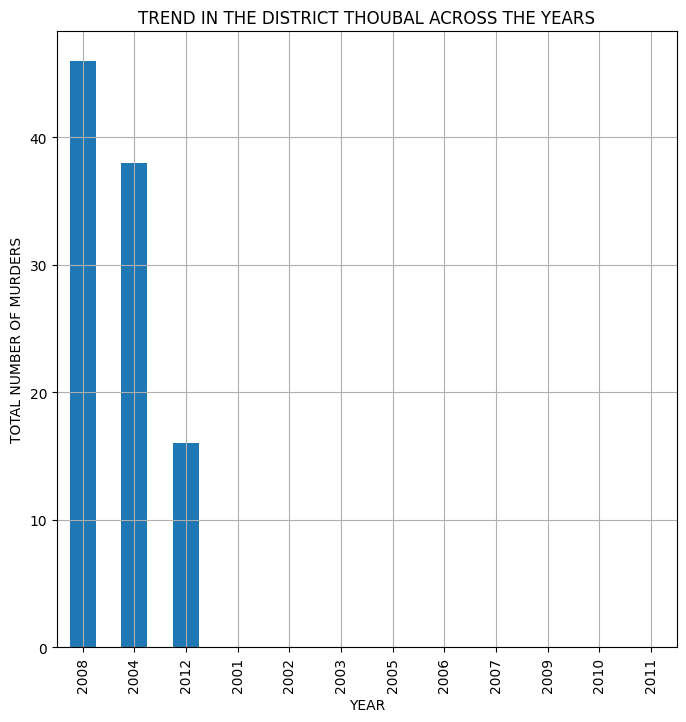

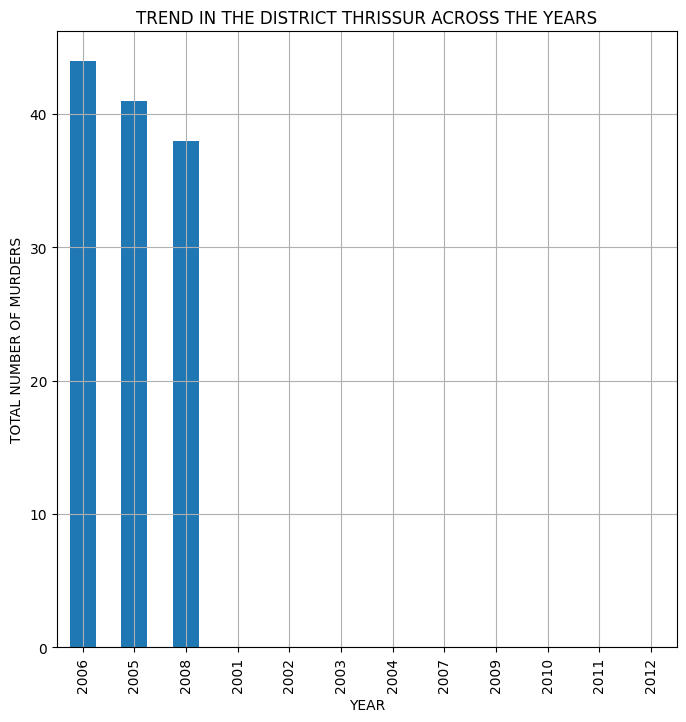

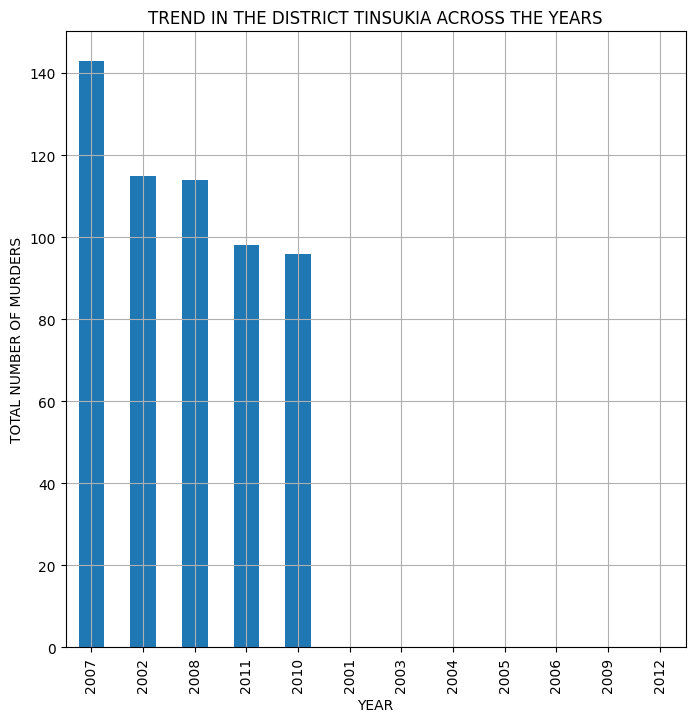

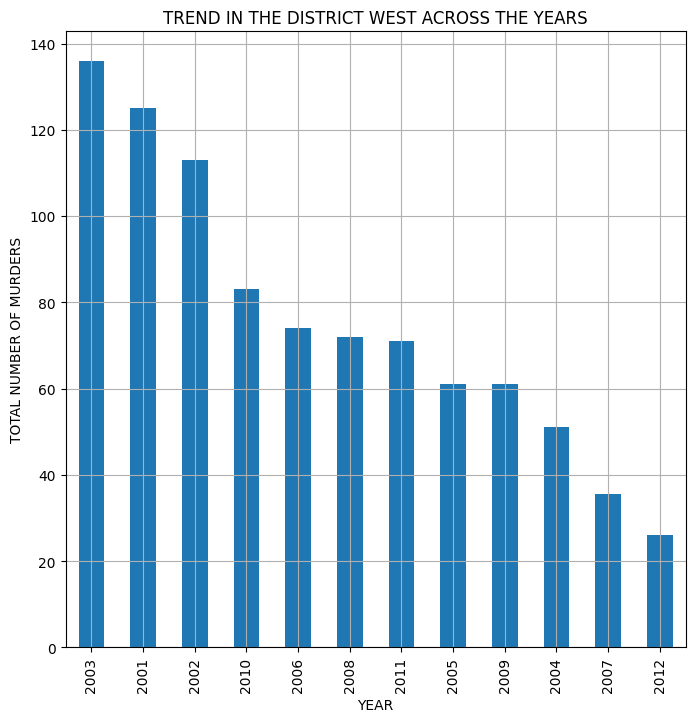

In [132]:
for i in pt1:
    pt[i].sort_values(ascending=False).plot(kind='bar',figsize=(8,8))
    plt.ylabel("TOTAL NUMBER OF MURDERS")
    plt.title("TREND IN THE DISTRICT {} ACROSS THE YEARS".format(i))
    plt.grid()
    plt.show()